# About Dataset

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

**Taget Variable:**<br>
RainTomorrow - The amount of next day rain in mm. Used to

*   RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"

**Independent Variables:**<br>
* Date - Date of observation<br>
* Location - The common name of the location of the weather station<br>
* MinTemp - The minimum temperature in degrees celsius<br>
* MaxTemp - The maximum temperature in degrees celsius<br>
* Rainfall - The amount of rainfall recorded for the day in mm<br>
* Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
* Sunshine - The number of hours of bright sunshine in the day.<br>
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight<br>
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
* WindDir9am - Direction of the wind at 9am<br>
* WindDir3pm - Direction of the wind at 3pm<br>
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
* Humidity9am - Humidity (percent) at 9am<br>
* Humidity3pm - Humidity (percent) at 3pm<br>
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many <br>
* Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values<br>
* Temp9am - Temperature (degrees C) at 9am<br>
* Temp3pm - Temperature (degrees C) at 3pm<br>
* RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/discussion)

#**1. ML Data Cleaning and feature selection**

##Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import random, math
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
import statsmodels.api as sm

In [ ]:
local_path = 'https://raw.githubusercontent.com/Asawarikadam44/INFO6105---Data-Science-methods-and-Tools/main/weatherAUS.csv'

Load the dataset

In [ ]:
df = pd.read_csv(local_path)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
#print total number of columns and rows present in the dataset
print('The Dataset has', df.shape[0], 'rows and', df.shape[1],'columns')

#print datatype of each column to find categorical and numerical variable
print('Column Name      Datatype')
print("")
print(df.dtypes)

The Dataset has 145460 rows and 23 columns
Column Name      Datatype

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


This weather dataset comprises 7 categorical columns with data stored as 'Object' datatype and 16 numerical columns represented as 'float64' datatype.

##EDA

### EDA on categorical variables

In [ ]:
# we will look at categorical columns which has datatype as 'Object'
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

# This will give statistical summary statistics of the categorical columns
df[cat_cols].describe()

#Look for concise summary of dataset using info()
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   135134 non-null  object
 3   WindDir9am    134894 non-null  object
 4   WindDir3pm    141232 non-null  object
 5   RainToday     142199 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


Now, we will impute categorical variable with mode

In [ ]:
# Impute categorical var with Mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

# Check Categorical columns again for the null values
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   145460 non-null  object
 3   WindDir9am    145460 non-null  object
 4   WindDir3pm    145460 non-null  object
 5   RainToday     145460 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


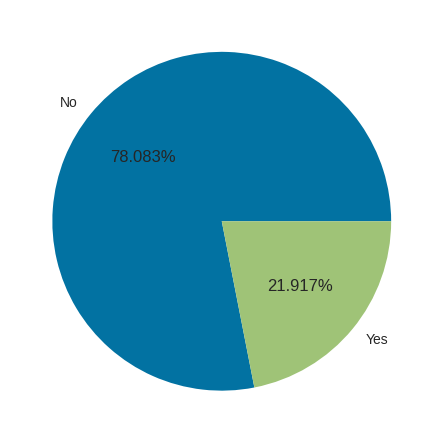

In [ ]:
# plot distribution of 'RainToday' variable
d = df['RainToday'].value_counts()
labels = list(d.index)
d
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

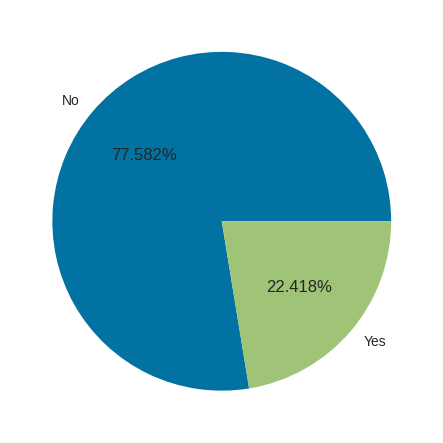

In [ ]:
# plot distribution of 'RainTomorrow' target variable
df.dropna(subset=['RainTomorrow'], inplace=True)
d = df['RainTomorrow'].value_counts()
labels = list(d.index)
d
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

We will convert Date object to year, month and date which then can be converted to categorical columns

In [ ]:
# Convert Date object to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Split Date to 'Year', 'Month' & 'Day'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop 'Date' from df
data = df.drop('Date', axis=1, inplace=True)

data = df.dropna(axis=0, how='any', subset=["RainTomorrow"])

df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [ ]:
# cat_features is a list of column names representing categorical features in a dataset
cat_features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']

print(data.shape)

df[cat_features].head()

(142193, 25)


Year  Month  Day Location WindGustDir WindDir9am WindDir3pm RainToday
0  2008     12    1   Albury           W          W        WNW        No
1  2008     12    2   Albury         WNW        NNW        WSW        No
2  2008     12    3   Albury         WSW          W        WSW        No
3  2008     12    4   Albury          NE         SE          E        No
4  2008     12    5   Albury           W        ENE         NW        No

In [ ]:
lencoders = {}
features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in data[features].columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [ ]:
encoded_data = data.copy()
encoded_data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6          NaN       NaN           13   
1         2      7.4     25.1       0.0          NaN       NaN           14   
2         2     12.9     25.7       0.0          NaN       NaN           15   
3         2      9.2     28.0       0.0          NaN       NaN            4   
4         2     17.5     32.3       1.0          NaN       NaN           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1       8.0   
1           44.0           6          15  ...       1007.8       NaN   
2           46.0          13          15  ...       1008.7       NaN   
3           24.0           9           0  ...       1012.8       NaN   
4           41.0           1           7  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0       NaN     16.9     21.8          0             0     1     11    0  
1       NaN     17.2     24.3          0             0     1     11    1  
2       2.0     21.0     23.2          0             0     1     11    2  
3       NaN     18.1     26.5          0             0     1     11    3  
4       8.0     17.8     29.7          0             0     1     11    4  

[5 rows x 25 columns]

### EDA on continuos variables

In [ ]:
# we will look at categorical columns which does not have datatype as 'Object'
num_cols = df.select_dtypes(exclude=['object']).columns
df[num_cols].head()

# This will give statistical summary statistics of the numerical columns
df[num_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  \
count  88536.000000  85099.000000  141289.000000  139467.000000   
mean       4.437189      4.503167      16.987509      21.687235   
std        2.887016      2.720633       6.492838       6.937594   
min        0.000000      0.000000      -7.200000      -5.400000   
25%        1.000000      2.000000      12.300000      16.600000   
50%        5.000000      5.000000      16.700000      21.100000   
75%        7.000000      7.000000      21.600000      26.400000   
max        9.000000      9.000000      40.200000      46.700000   

                Year          Month            Day  
count  142193.000000  142193.000000  142193.000000  
mean     2012.758926       6.402544      15.715084  
std         2.541256       3.426506       8.798150  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

In [ ]:
# num_features is a list of column names representing numerical features in a dataset
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

df[num_features]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0          NaN       NaN           31.0   
145455      2.8     23.4       0.0          NaN       NaN           31.0   
145456      3.6     25.3       0.0          NaN       NaN           22.0   
145457      5.4     26.9       0.0          NaN       NaN           37.0   
145458      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1       8.0       NaN     16.9     21.8  
1            1007.8       NaN       NaN     17.2     24.3  
2            1008.7       NaN       2.0     21.0     23.2  
3            1012.8       NaN       NaN     18.1     26.5  
4            1006.0       7.0       8.0     17.8     29.7  
...             ...       ...       ...      ...      ...  
145454       1021.2       NaN       NaN      9.4     20.9  
145455       1020.3       NaN       NaN     10.1     22.4  
145456       1019.1       NaN       NaN     10.9     24.5  
145457       1016.8       NaN       NaN     12.5     26.1  
145458       1016.5       3.0       2.0     15.1     26.0  

[142193 rows x 16 columns]

## Which independent variables have missing data? How much?

###ProfileReport

In [ ]:
#!pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas profiling before data preprocessing', minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Lets find missing value columns
missing_values = encoded_data[num_features].isnull().sum()

# Missing values in percent
missing_values_pct = encoded_data[num_features].isnull().sum()/encoded_data.shape[0]*100
missing_values_pct.sort_values(ascending=False)

missing_values
missing_values_pct.sort_values(ascending=False)

Sunshine         47.692924
Evaporation      42.789026
Cloud3pm         40.152469
Cloud9am         37.735332
Pressure9am       9.855619
Pressure3pm       9.832411
WindGustSpeed     6.519308
Humidity3pm       2.538803
Temp3pm           1.917113
WindSpeed3pm      1.849599
Humidity9am       1.247600
Rainfall          0.988797
WindSpeed9am      0.948007
Temp9am           0.635756
MinTemp           0.447983
MaxTemp           0.226453
dtype: float64

Now we will impute values to missing data

###Data Imputation

In [ ]:
# Impute data with MICE imputer
imputed_data = encoded_data.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)

# Check for missing values
imputed_data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
<ipython-input-64-047d8bd77f6f>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

##Distributions of variables

###What are the likely distributions of the numeric variables?

<ipython-input-65-55153330f082>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  imputed_data.hist(ax=ax)


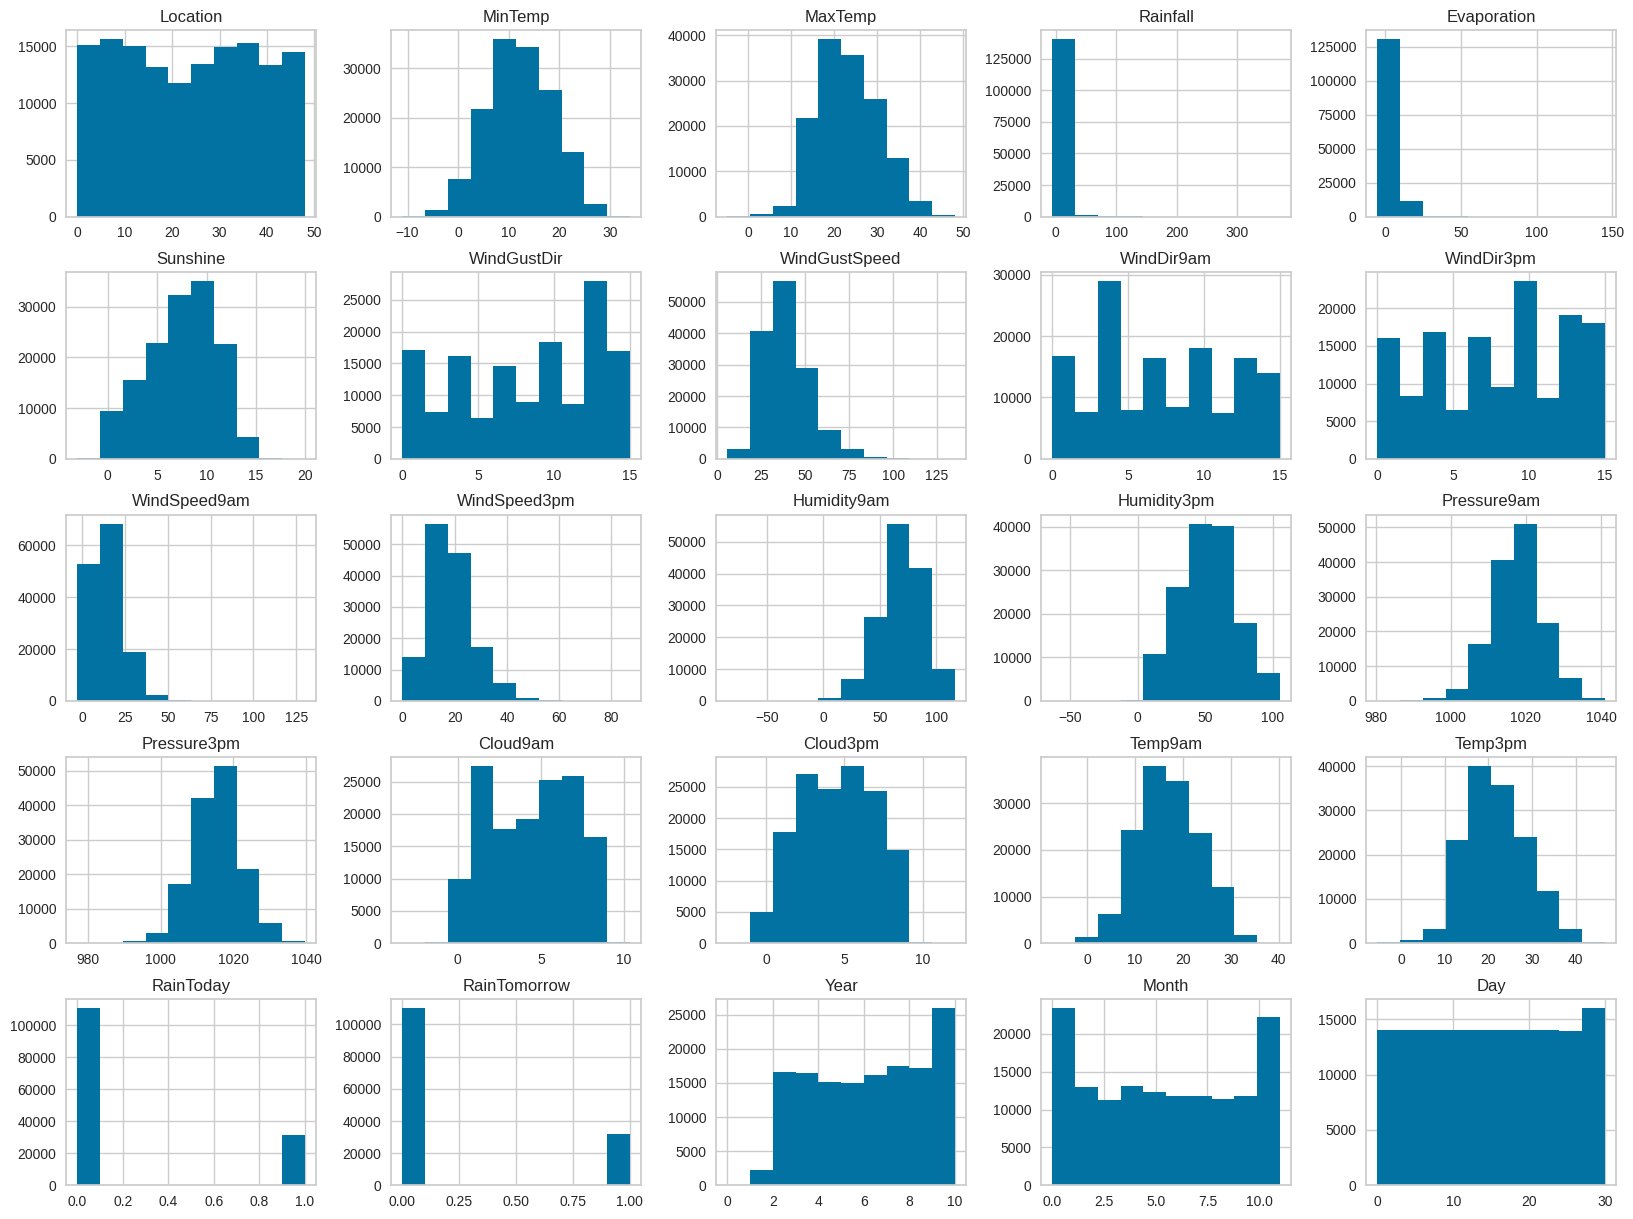

In [ ]:
# Plot Histogram
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
imputed_data.hist(ax=ax)
plt.show()

QQ Plot

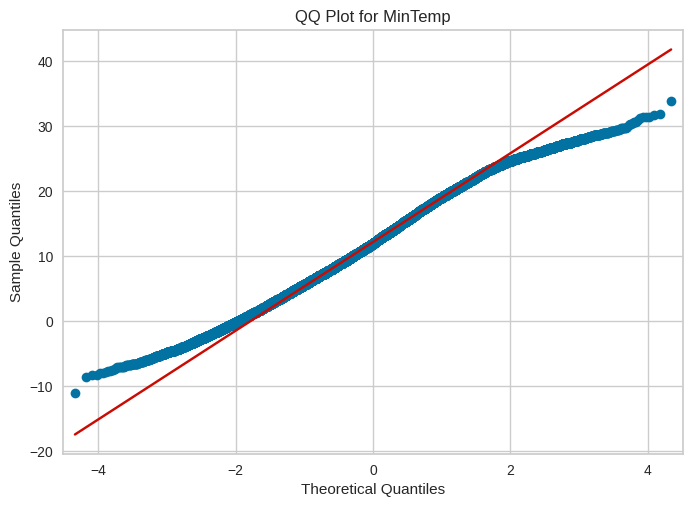

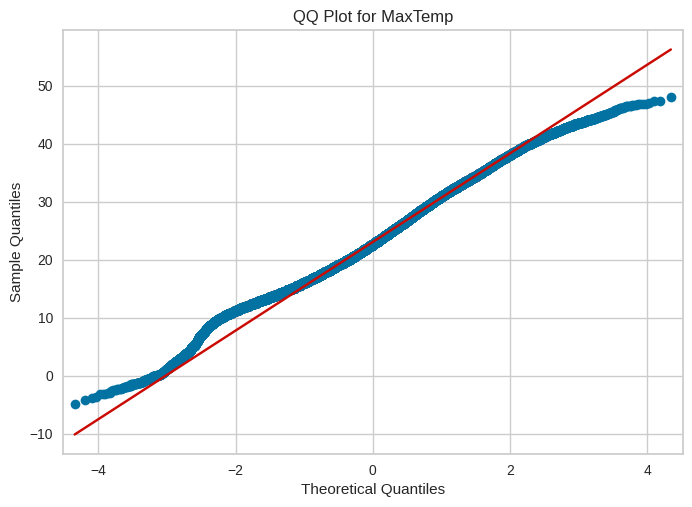

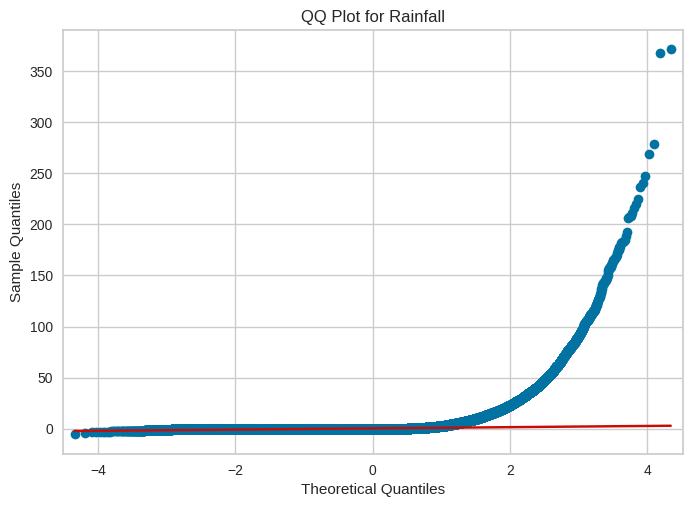

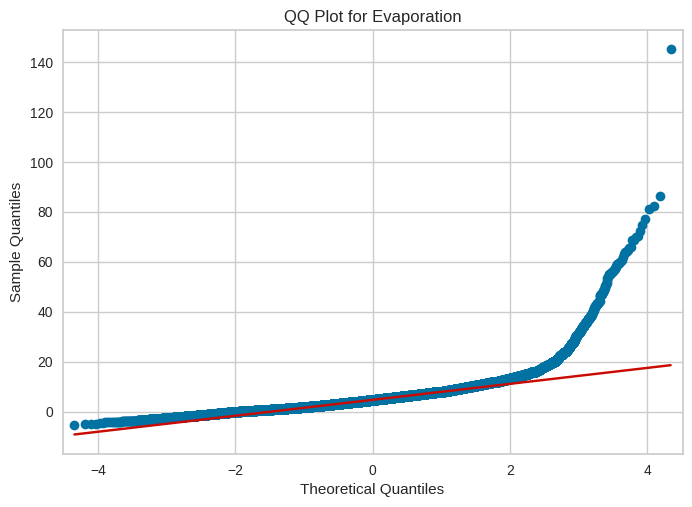

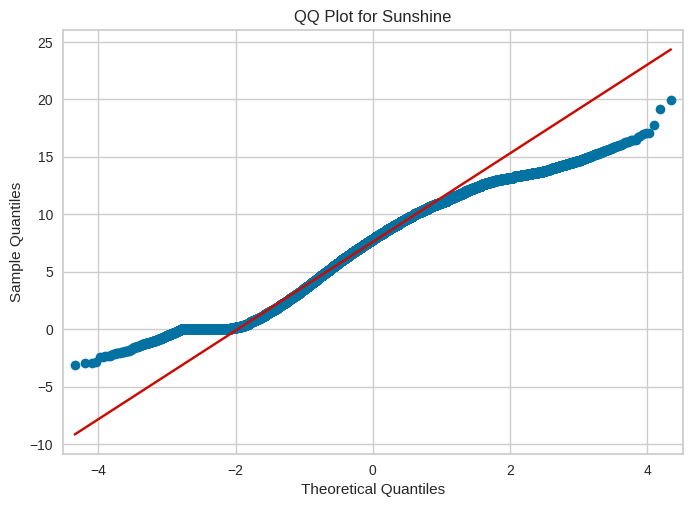

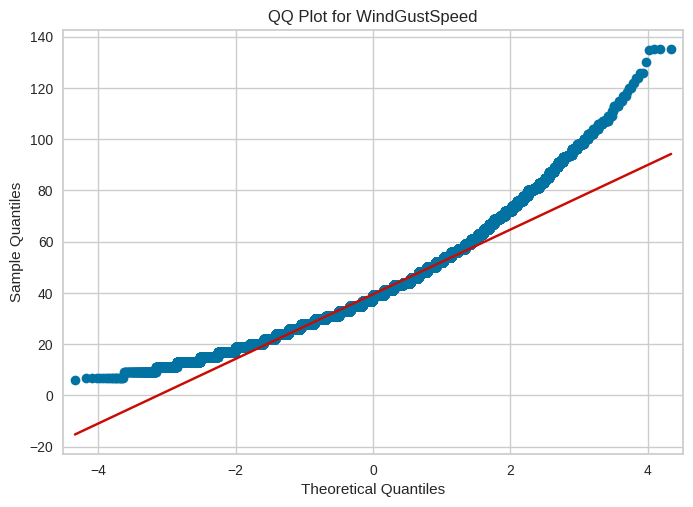

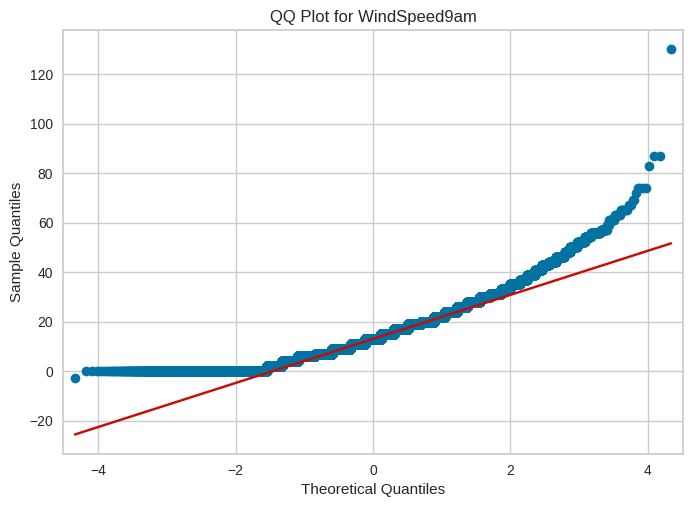

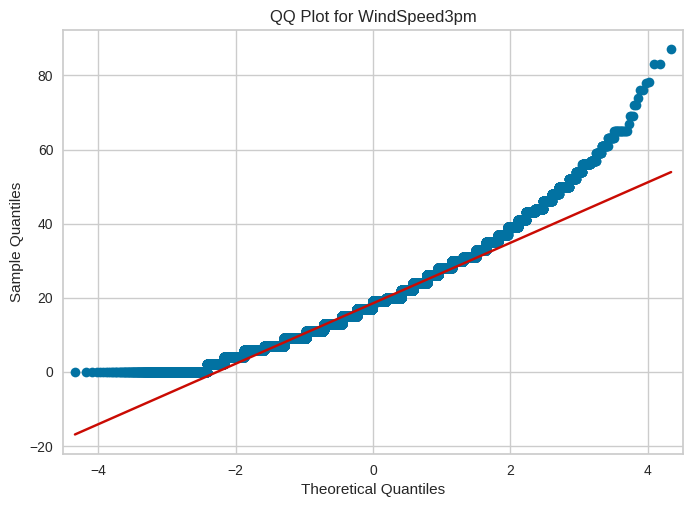

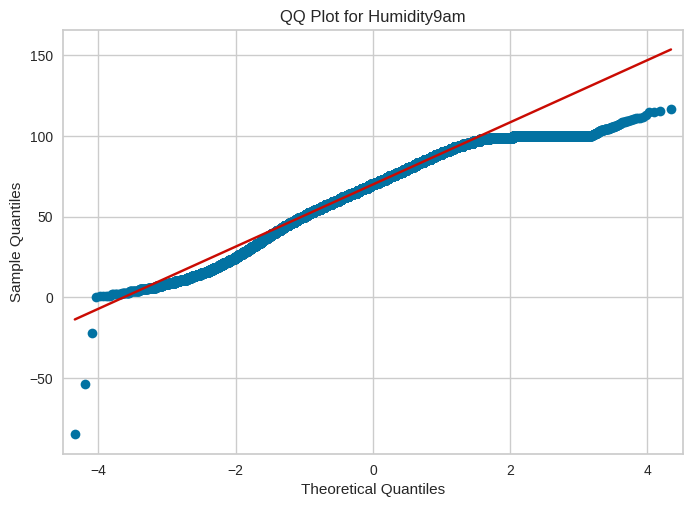

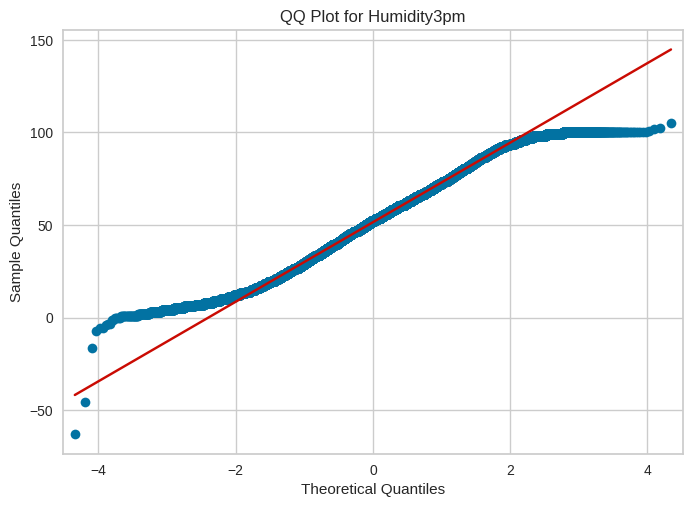

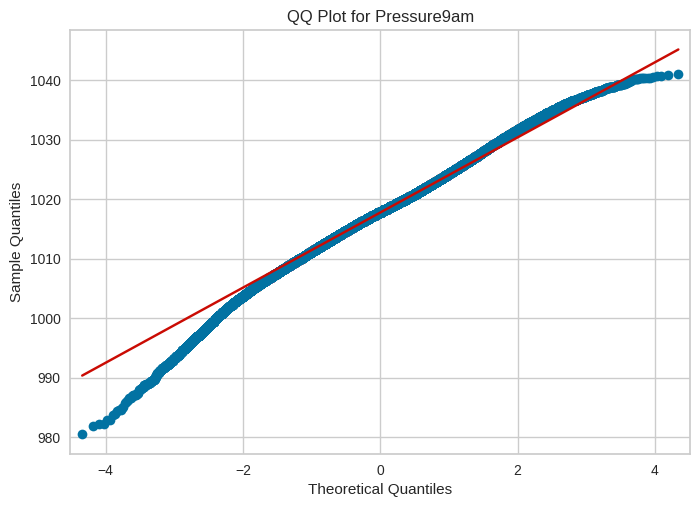

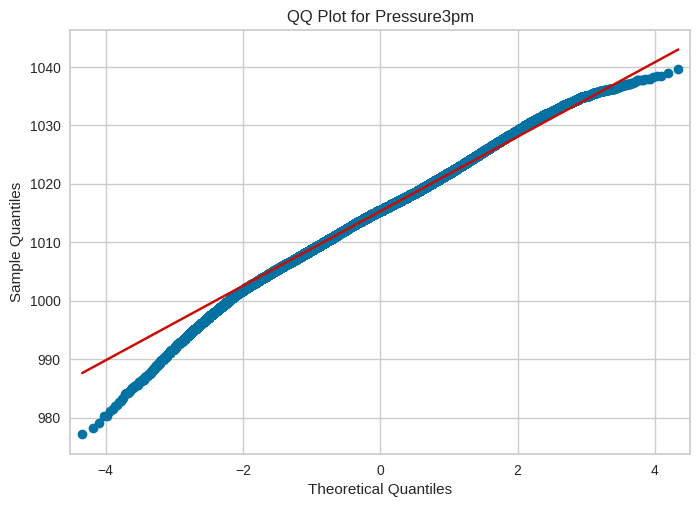

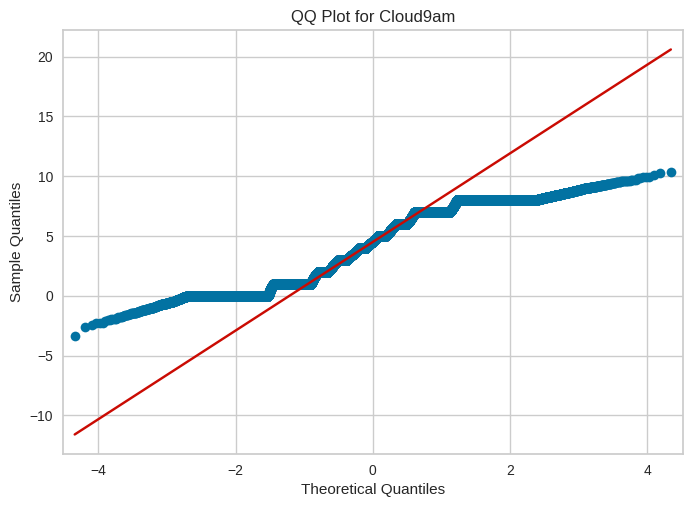

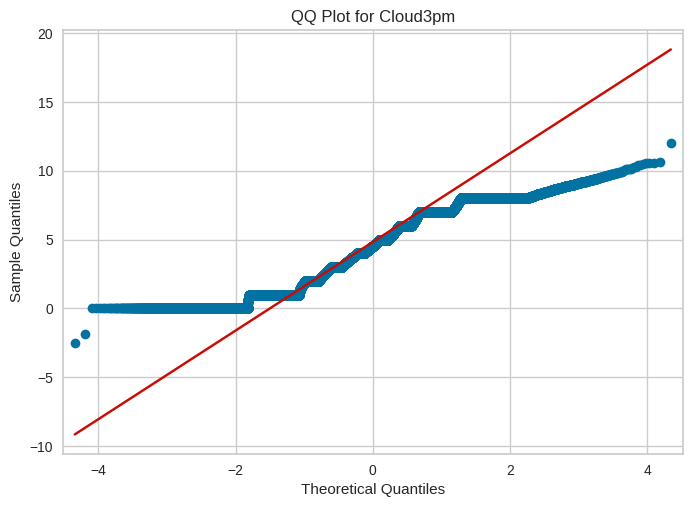

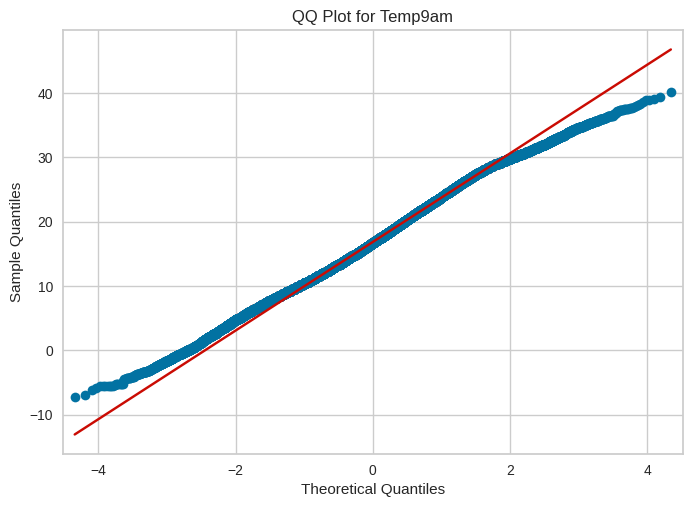

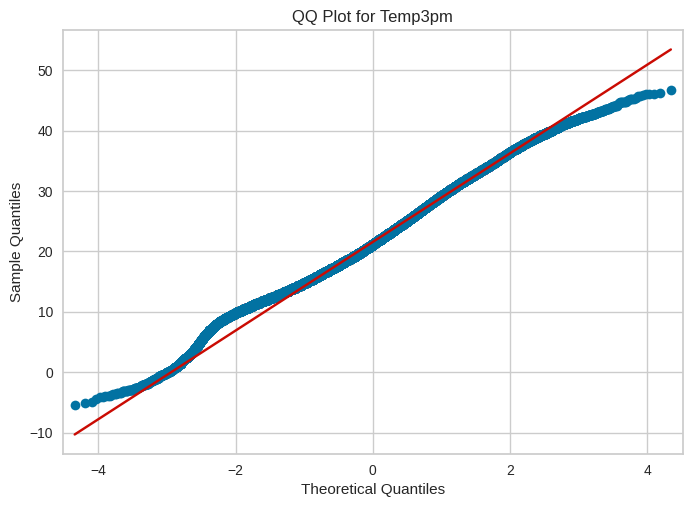

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Loop through each numeric column in the DataFrame
for column in df.select_dtypes(include=['float64']):
#    data = df[column].dropna()  # Remove missing values if any
    sm.qqplot(imputed_data[column], line='q')
    plt.title(f'QQ Plot for {column}')
    plt.show()



*   **Bimodal Distributions:** Sunshine, Cloud9am, Cloud3pm
*   **Skewed Normal Distributions:** MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm
*   **Exponential Distributions:** Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm


### What are the distributions of the predictor variables?   

In [ ]:
for column in imputed_data[cat_features]:
  # Calculate the frequency of each category
  freq = imputed_data[column].value_counts()
  print(column)
  # Print the frequency of each category
  print(freq)
  print("")

Year
9.0     17508
7.0     17400
8.0     17231
2.0     16595
3.0     16419
6.0     16097
4.0     15126
5.0     15044
10.0     8466
1.0      2246
0.0        61
Name: Year, dtype: int64

Month
4.0     13055
2.0     13036
0.0     12921
5.0     12389
9.0     11804
6.0     11779
7.0     11762
10.0    11461
8.0     11345
3.0     11306
11.0    10810
1.0     10525
Name: Month, dtype: int64

Day
0.0     4688
14.0    4688
15.0    4687
12.0    4686
1.0     4686
5.0     4684
21.0    4684
2.0     4683
11.0    4682
6.0     4680
20.0    4677
13.0    4677
18.0    4676
19.0    4675
3.0     4674
22.0    4672
8.0     4672
16.0    4671
7.0     4671
10.0    4668
4.0     4667
23.0    4666
24.0    4665
17.0    4665
9.0     4664
25.0    4637
27.0    4630
26.0    4627
28.0    4374
29.0    4280
30.0    2737
Name: Day, dtype: int64

Location
9.0     3418
37.0    3337
31.0    3193
13.0    3192
15.0    3188
7.0     3161
0.0     3090
6.0     3034
39.0    3033
3.0     3031
22.0    3030
17.0    3028
5.0     3028
1.0 

In [ ]:
normalized_data = imputed_data.copy()
for column in normalized_data[cat_features]:
    freq = normalized_data[column].value_counts(normalize=True)
    print(f"{column}\n{freq}\n")

Year
9.0     0.123128
7.0     0.122369
8.0     0.121180
2.0     0.116708
3.0     0.115470
6.0     0.113205
4.0     0.106377
5.0     0.105800
10.0    0.059539
1.0     0.015795
0.0     0.000429
Name: Year, dtype: float64

Month
4.0     0.091812
2.0     0.091678
0.0     0.090869
5.0     0.087128
9.0     0.083014
6.0     0.082838
7.0     0.082719
10.0    0.080602
8.0     0.079786
3.0     0.079512
11.0    0.076023
1.0     0.074019
Name: Month, dtype: float64

Day
0.0     0.032969
14.0    0.032969
15.0    0.032962
12.0    0.032955
1.0     0.032955
5.0     0.032941
21.0    0.032941
2.0     0.032934
11.0    0.032927
6.0     0.032913
20.0    0.032892
13.0    0.032892
18.0    0.032885
19.0    0.032878
3.0     0.032871
22.0    0.032857
8.0     0.032857
16.0    0.032850
7.0     0.032850
10.0    0.032829
4.0     0.032822
23.0    0.032815
24.0    0.032808
17.0    0.032808
9.0     0.032800
25.0    0.032611
27.0    0.032561
26.0    0.032540
28.0    0.030761
29.0    0.030100
30.0    0.019248
Name: Day,

Year


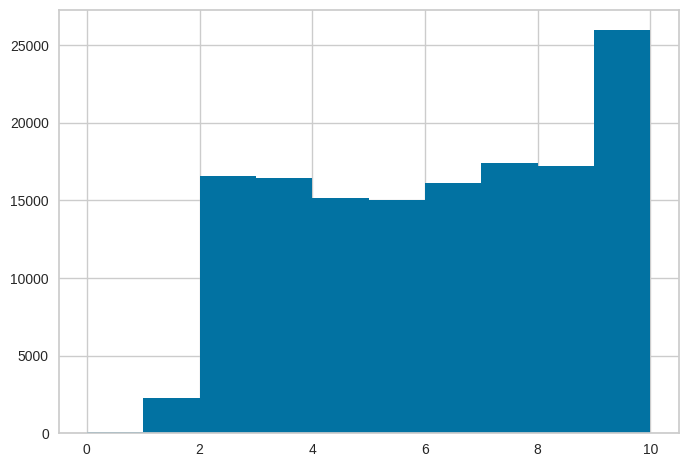

Month


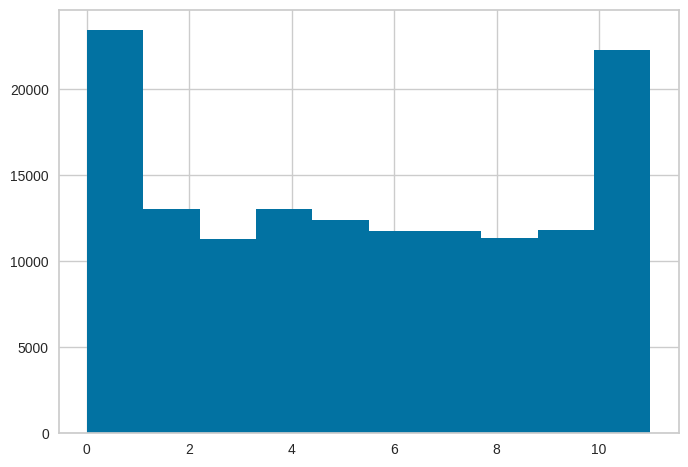

Day


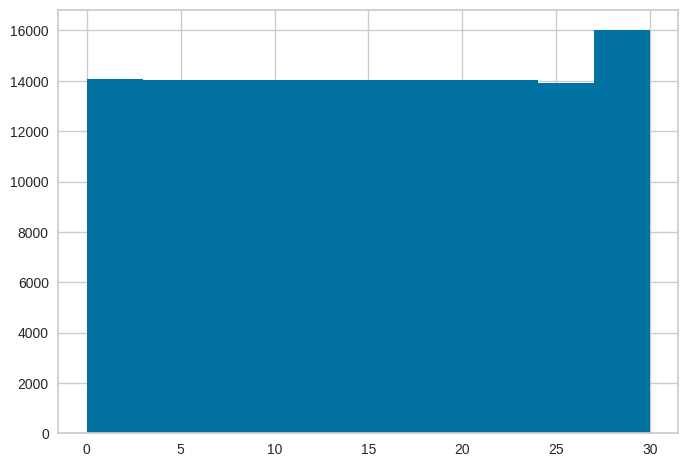

Location


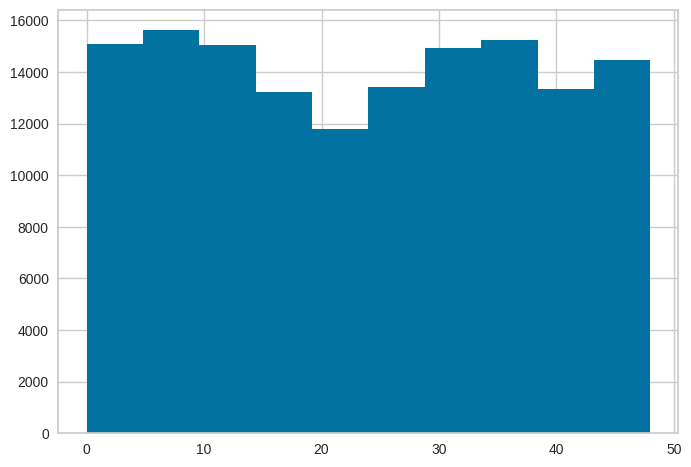

WindGustDir


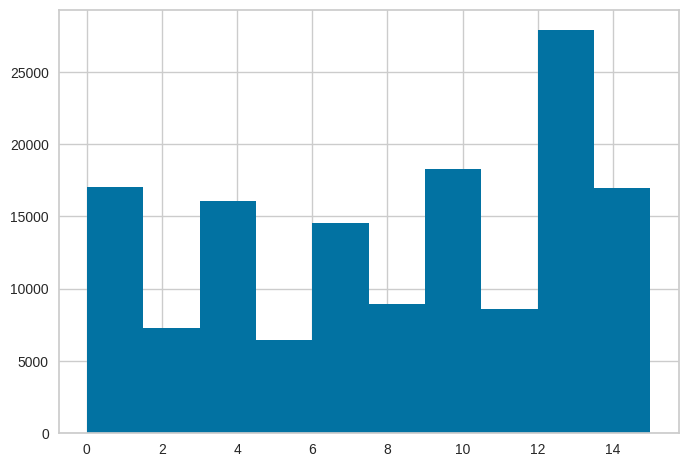

WindDir9am


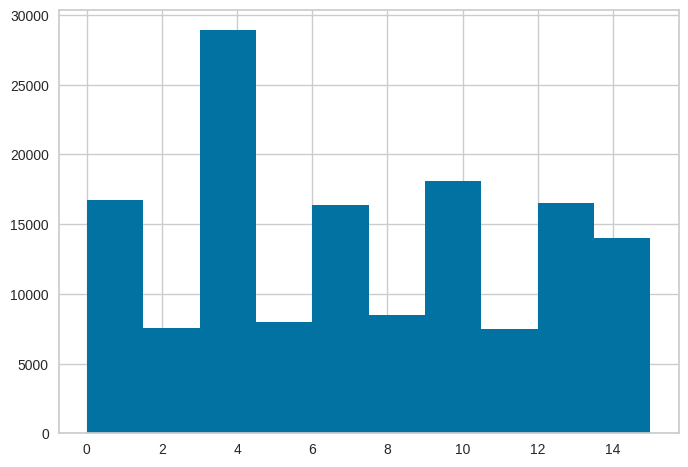

WindDir3pm


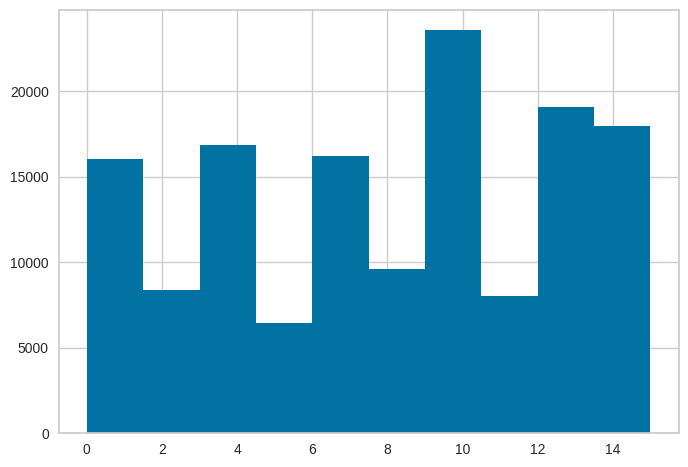

RainToday


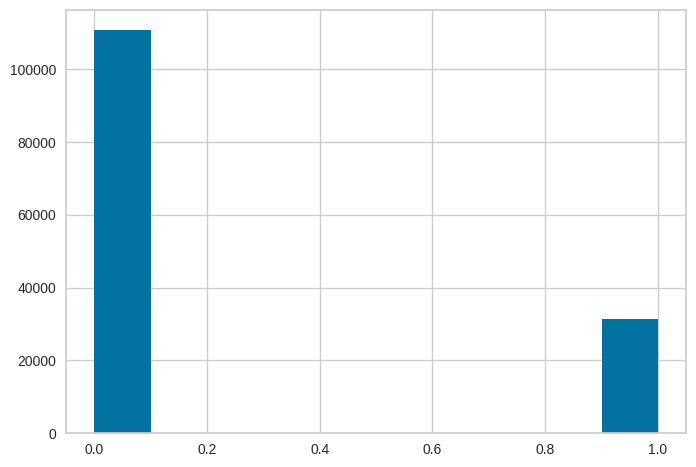

In [ ]:
for i, column in enumerate(normalized_data[cat_features]):
    print(column)
    plt.figure(i)
    normalized_data[column].hist()
    plt.show()

<Axes: xlabel='RainTomorrow', ylabel='count'>

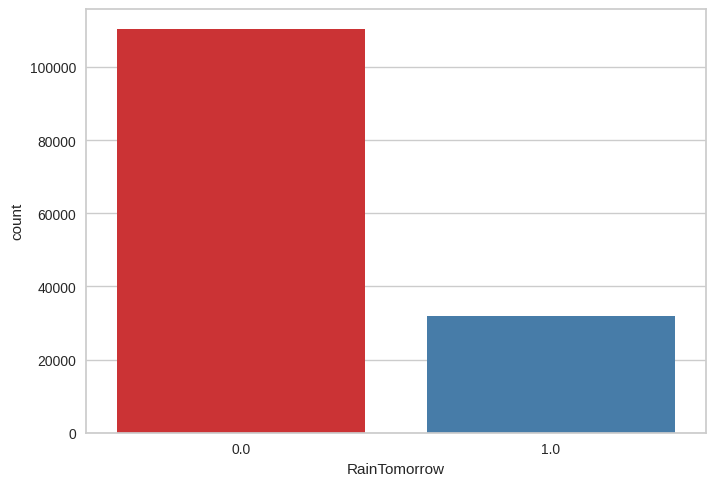

In [ ]:
# check Countplot for "RainTomorrow" target variable
sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")

<Axes: xlabel='RainTomorrow', ylabel='count'>

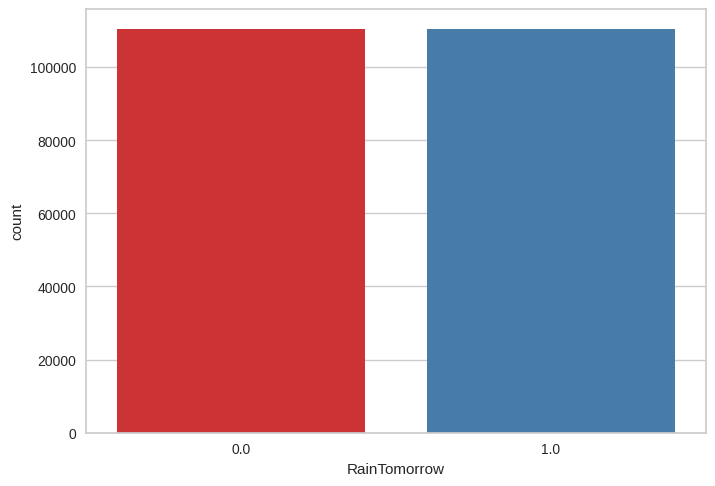

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = normalized_data[normalized_data.RainTomorrow == 0]
minority_class = normalized_data[normalized_data.RainTomorrow == 1]

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the majority class and upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

# Now, balanced_df contains a balanced dataset
sns.countplot(x='RainTomorrow', data = balanced_df, palette = "Set1")

## Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [ ]:
# Standardize our Data - Feature Scaling 0-1 scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(normalized_data), columns=normalized_data.columns)

df_scaled.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.041667  0.543546  0.523629  0.016377     0.074789  0.460249     0.866667   
1  0.041667  0.409950  0.565217  0.014783     0.074041  0.624385     0.933333   
2  0.041667  0.532413  0.576560  0.014783     0.089515  0.663052     1.000000   
3  0.041667  0.450029  0.620038  0.014783     0.076876  0.652139     0.266667   
4  0.041667  0.634837  0.701323  0.017439     0.082383  0.410531     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0       0.294574    0.866667    0.933333  ...       0.4800  0.828973   
1       0.294574    0.400000    1.000000  ...       0.4912  0.386882   
2       0.310078    0.866667    1.000000  ...       0.5056  0.393625   
3       0.139535    0.600000    0.000000  ...       0.5712  0.326243   
4       0.271318    0.066667    0.466667  ...       0.4624  0.755829   

   Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  Year  Month  \
0  0.516839  0.508439  0.522073        0.0           0.0   0.1    1.0   
1  0.350588  0.514768  0.570058        0.0           0.0   0.1    1.0   
2  0.308159  0.594937  0.548944        0.0           0.0   0.1    1.0   
3  0.297931  0.533755  0.612284        0.0           0.0   0.1    1.0   
4  0.721418  0.527426  0.673704        0.0           0.0   0.1    1.0   

        Day  
0  0.000000  
1  0.033333  
2  0.066667  
3  0.100000  
4  0.133333  

[5 rows x 25 columns]

###1) Using SelectKBest feature selection technique

In [ ]:
# Selection of the most important features using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

X = df_scaled.loc[:,df_scaled.columns!='RainTomorrow']
y = df_scaled[['RainTomorrow']]

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
print("The 5 most important predictor variables are:\n", X.columns[selector.get_support(indices=True)])

The 5 most important predictor variables are:
 Index(['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'], dtype='object')


### 2) Using heatmap

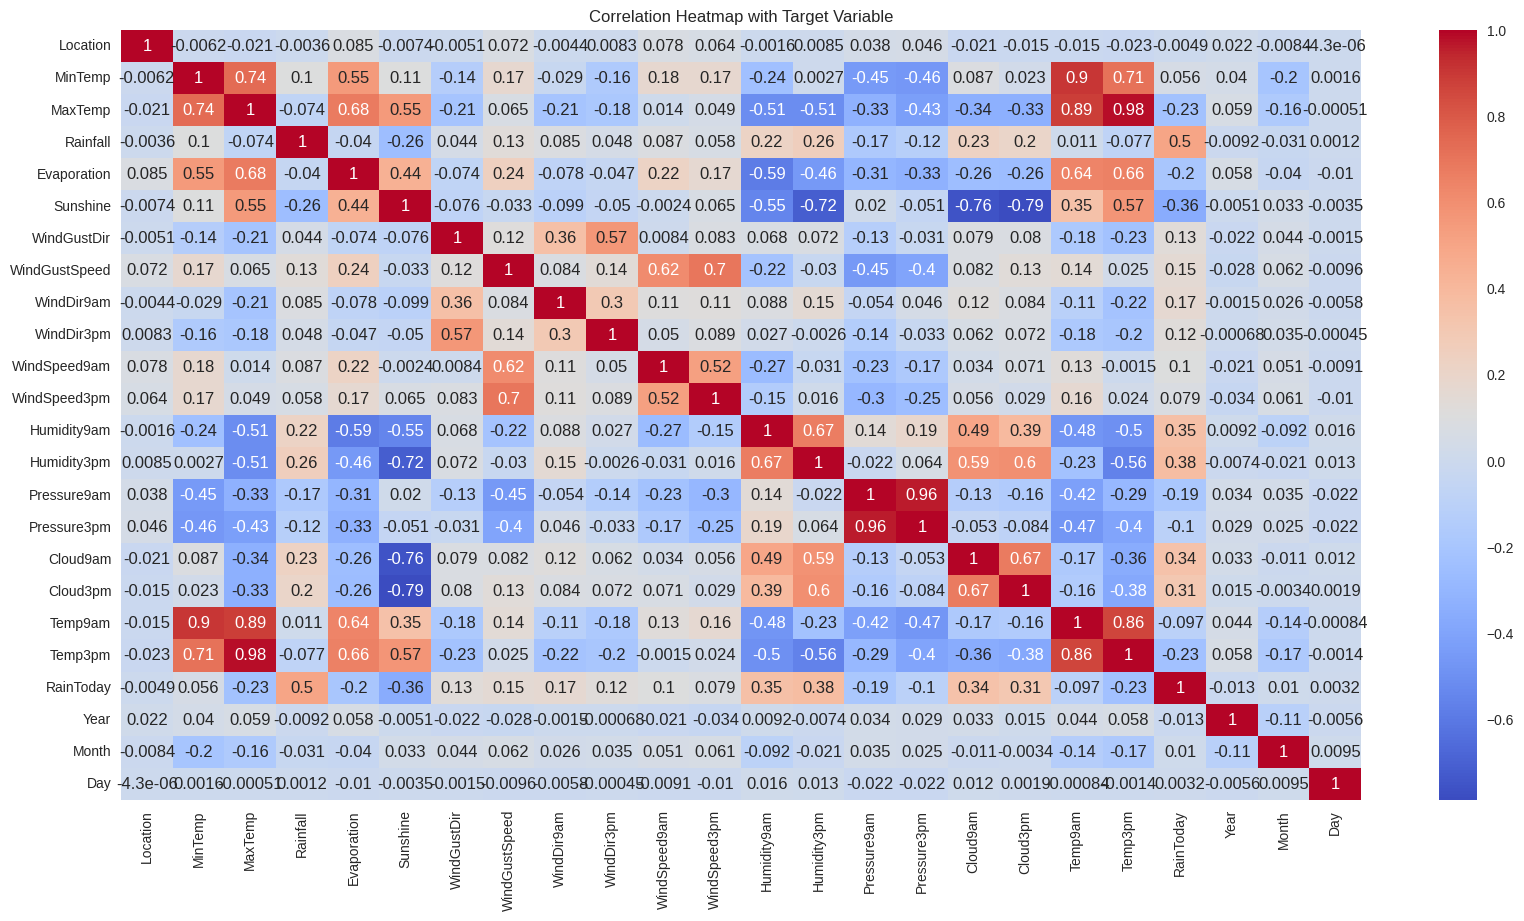

In [ ]:
X = df_scaled.drop('RainTomorrow', axis=1)  # Replace 'TargetVariable' with the actual name of your target variable
y = df_scaled['RainTomorrow']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Target Variable")
plt.show()


1. **MinTemp and MaxTemp**: These variables have a strong positive correlation with a coefficient of 0.74.

2. **MinTemp and Temp3pm**: There is a notable positive correlation of 0.71 between MinTemp and Temp3pm.

3. **MinTemp and Temp9am**: The correlation between MinTemp and Temp9am is exceptionally strong, with a coefficient of 0.90.

4. **MaxTemp and Temp9am**: MaxTemp and Temp9am also display a robust positive correlation, having a coefficient of 0.89.

5. **MaxTemp and Temp3pm**: MaxTemp and Temp3pm exhibit a remarkably strong positive correlation, with a coefficient of 0.98.

6. **WindGustSpeed and WindSpeed3pm**: These variables are highly positively correlated, with a coefficient of 0.69.

7. **Pressure9am and Pressure3pm**: Pressure9am and Pressure3pm show a very strong positive correlation, with a coefficient of 0.96.

8. **Temp9am and Temp3pm**: The correlation between Temp9am and Temp3pm is quite strong, with a coefficient of 0.86.

In summary, these pairs of variables demonstrate substantial positive relationships, as indicated by their correlation coefficients.

### 3) Using FeatureCorrelation visualizer from Yellowbrick

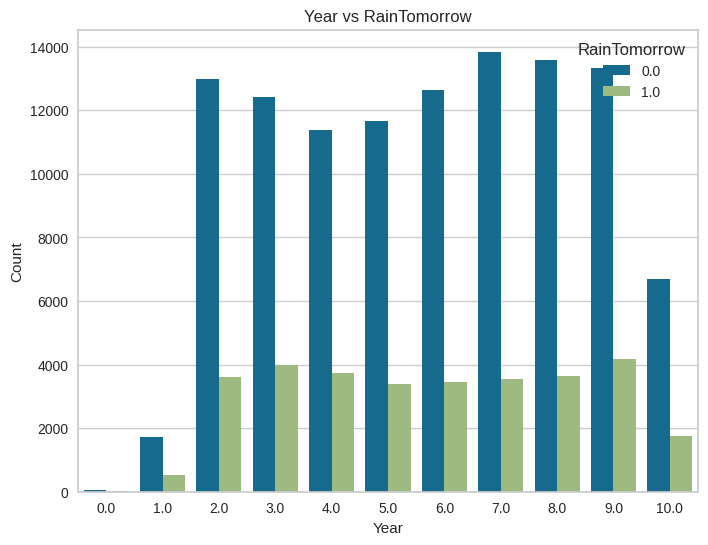

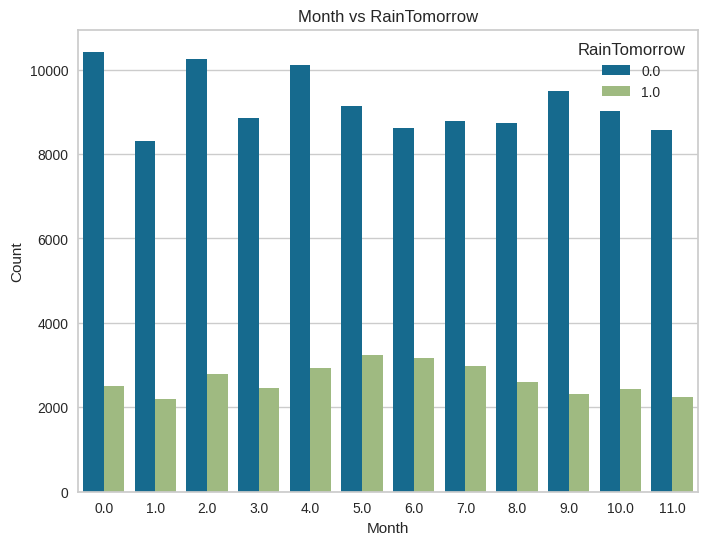

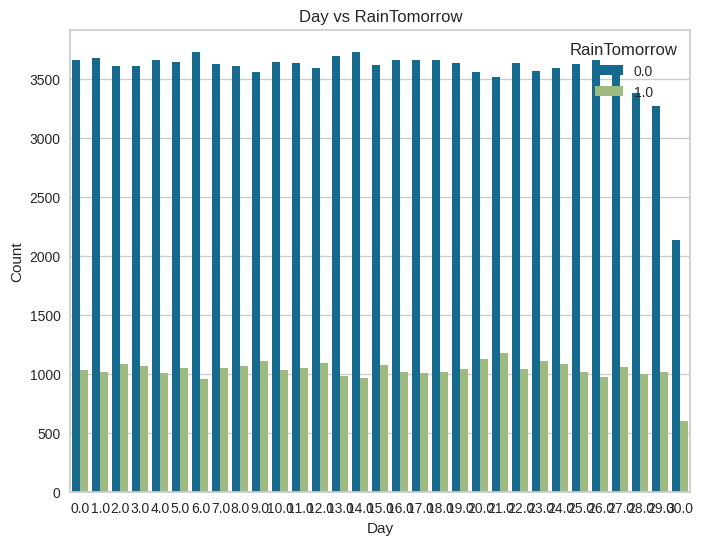

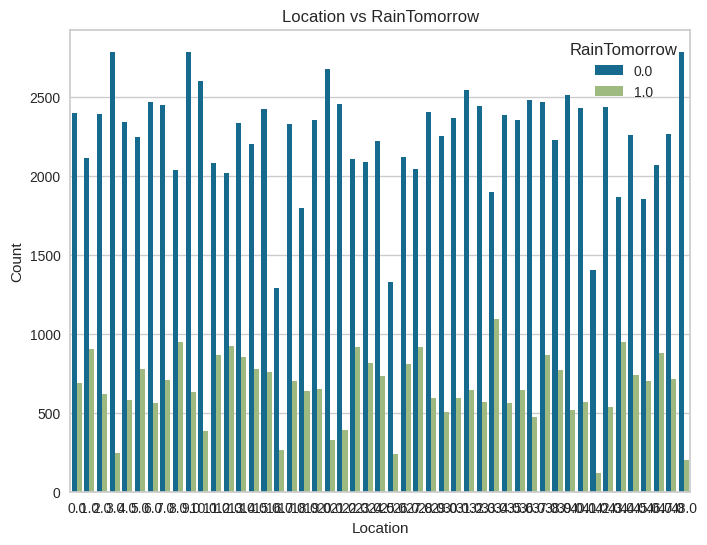

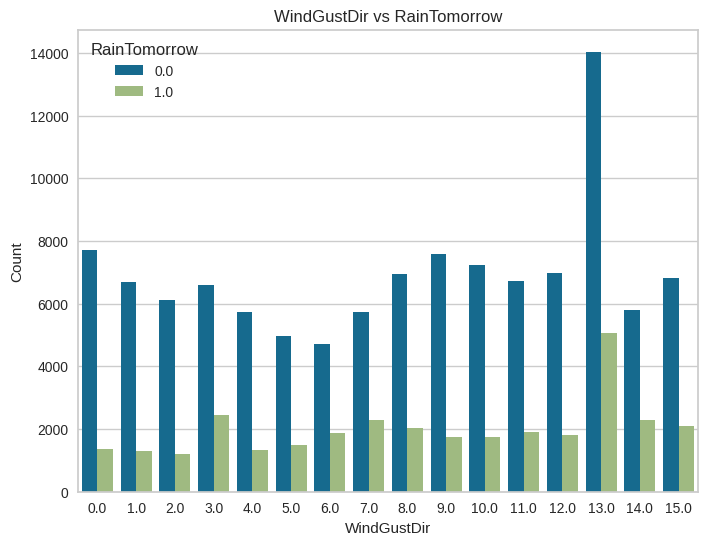

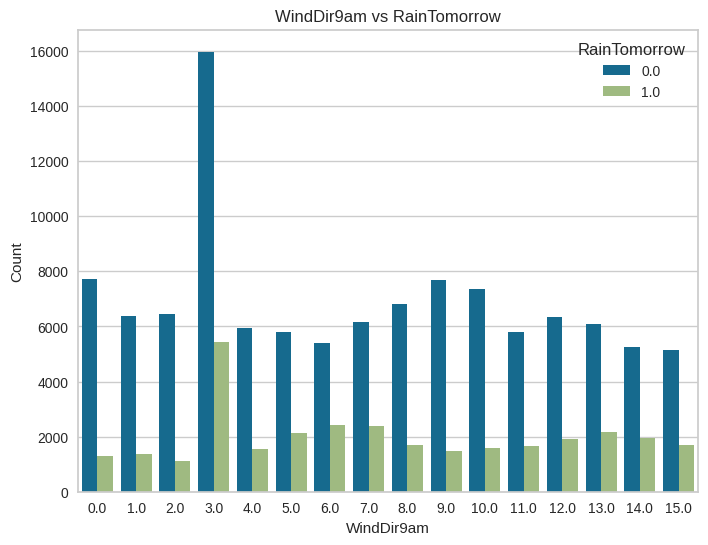

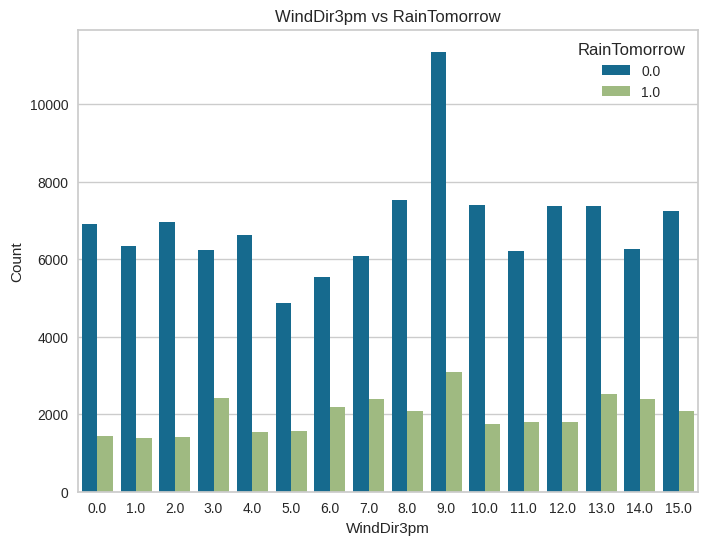

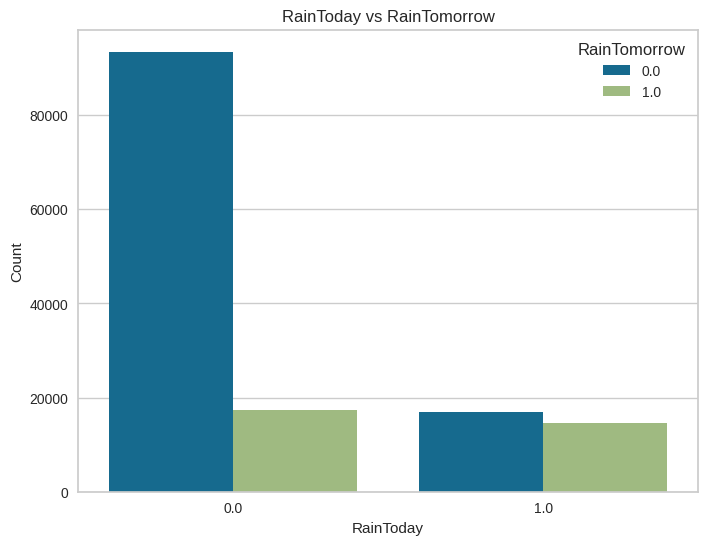

In [ ]:
for column in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='RainTomorrow', data=normalized_data)
    plt.title(f'{column} vs RainTomorrow')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
X = normalized_data.drop(['RainTomorrow'],axis=1)
y = normalized_data['RainTomorrow']

X.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustDir  \
0       2.0     13.4     22.9       0.6     6.087168   7.523748         13.0   
1       2.0      7.4     25.1       0.0     5.974799  11.301878         14.0   
2       2.0     12.9     25.7       0.0     8.298065  12.191940         15.0   
3       2.0      9.2     28.0       0.0     6.400503  11.940729          4.0   
4       2.0     17.5     32.3       1.0     7.227323   6.379332         13.0   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0           44.0        13.0        14.0  ...       1007.7       1007.1   
1           44.0         6.0        15.0  ...       1010.6       1007.8   
2           46.0        13.0        15.0  ...       1007.6       1008.7   
3           24.0         9.0         0.0  ...       1017.6       1012.8   
4           41.0         1.0         7.0  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  Month  Day  
0  8.000000  5.029771     16.9     21.8        0.0   1.0   11.0  0.0  
1  1.955876  2.616015     17.2     24.3        0.0   1.0   11.0  1.0  
2  2.048058  2.000000     21.0     23.2        0.0   1.0   11.0  2.0  
3  1.126834  1.851511     18.1     26.5        0.0   1.0   11.0  3.0  
4  7.000000  8.000000     17.8     29.7        0.0   1.0   11.0  4.0  

[5 rows x 24 columns]

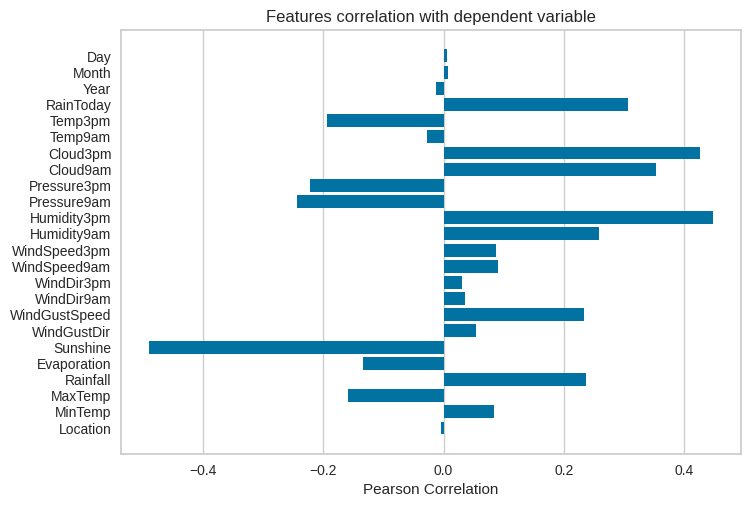

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(X.columns)

visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()

Observation:


*   **RainToday**, **Cloud3pm**, **Cloud9am**, **Humidity3pm**, **Humidity9am**, **WindGustSpeed** and **Rainfall** are positively associated with the target.
*   Whereas, Sunshine, Pressure3pm and Pressure9am are negatively associated with the target.Hence, those are not useful feature for predicting target.







### Which predictor variables are the most important?

**RainToday**, **Cloud3pm**, **Cloud9am**, **Humidity3pm**, **Humidity9am**, **WindGustSpeed** and **Rainfall** are most important variable for predicting taget.

### Do the ranges of the predictor variables make sense?

<Axes: >

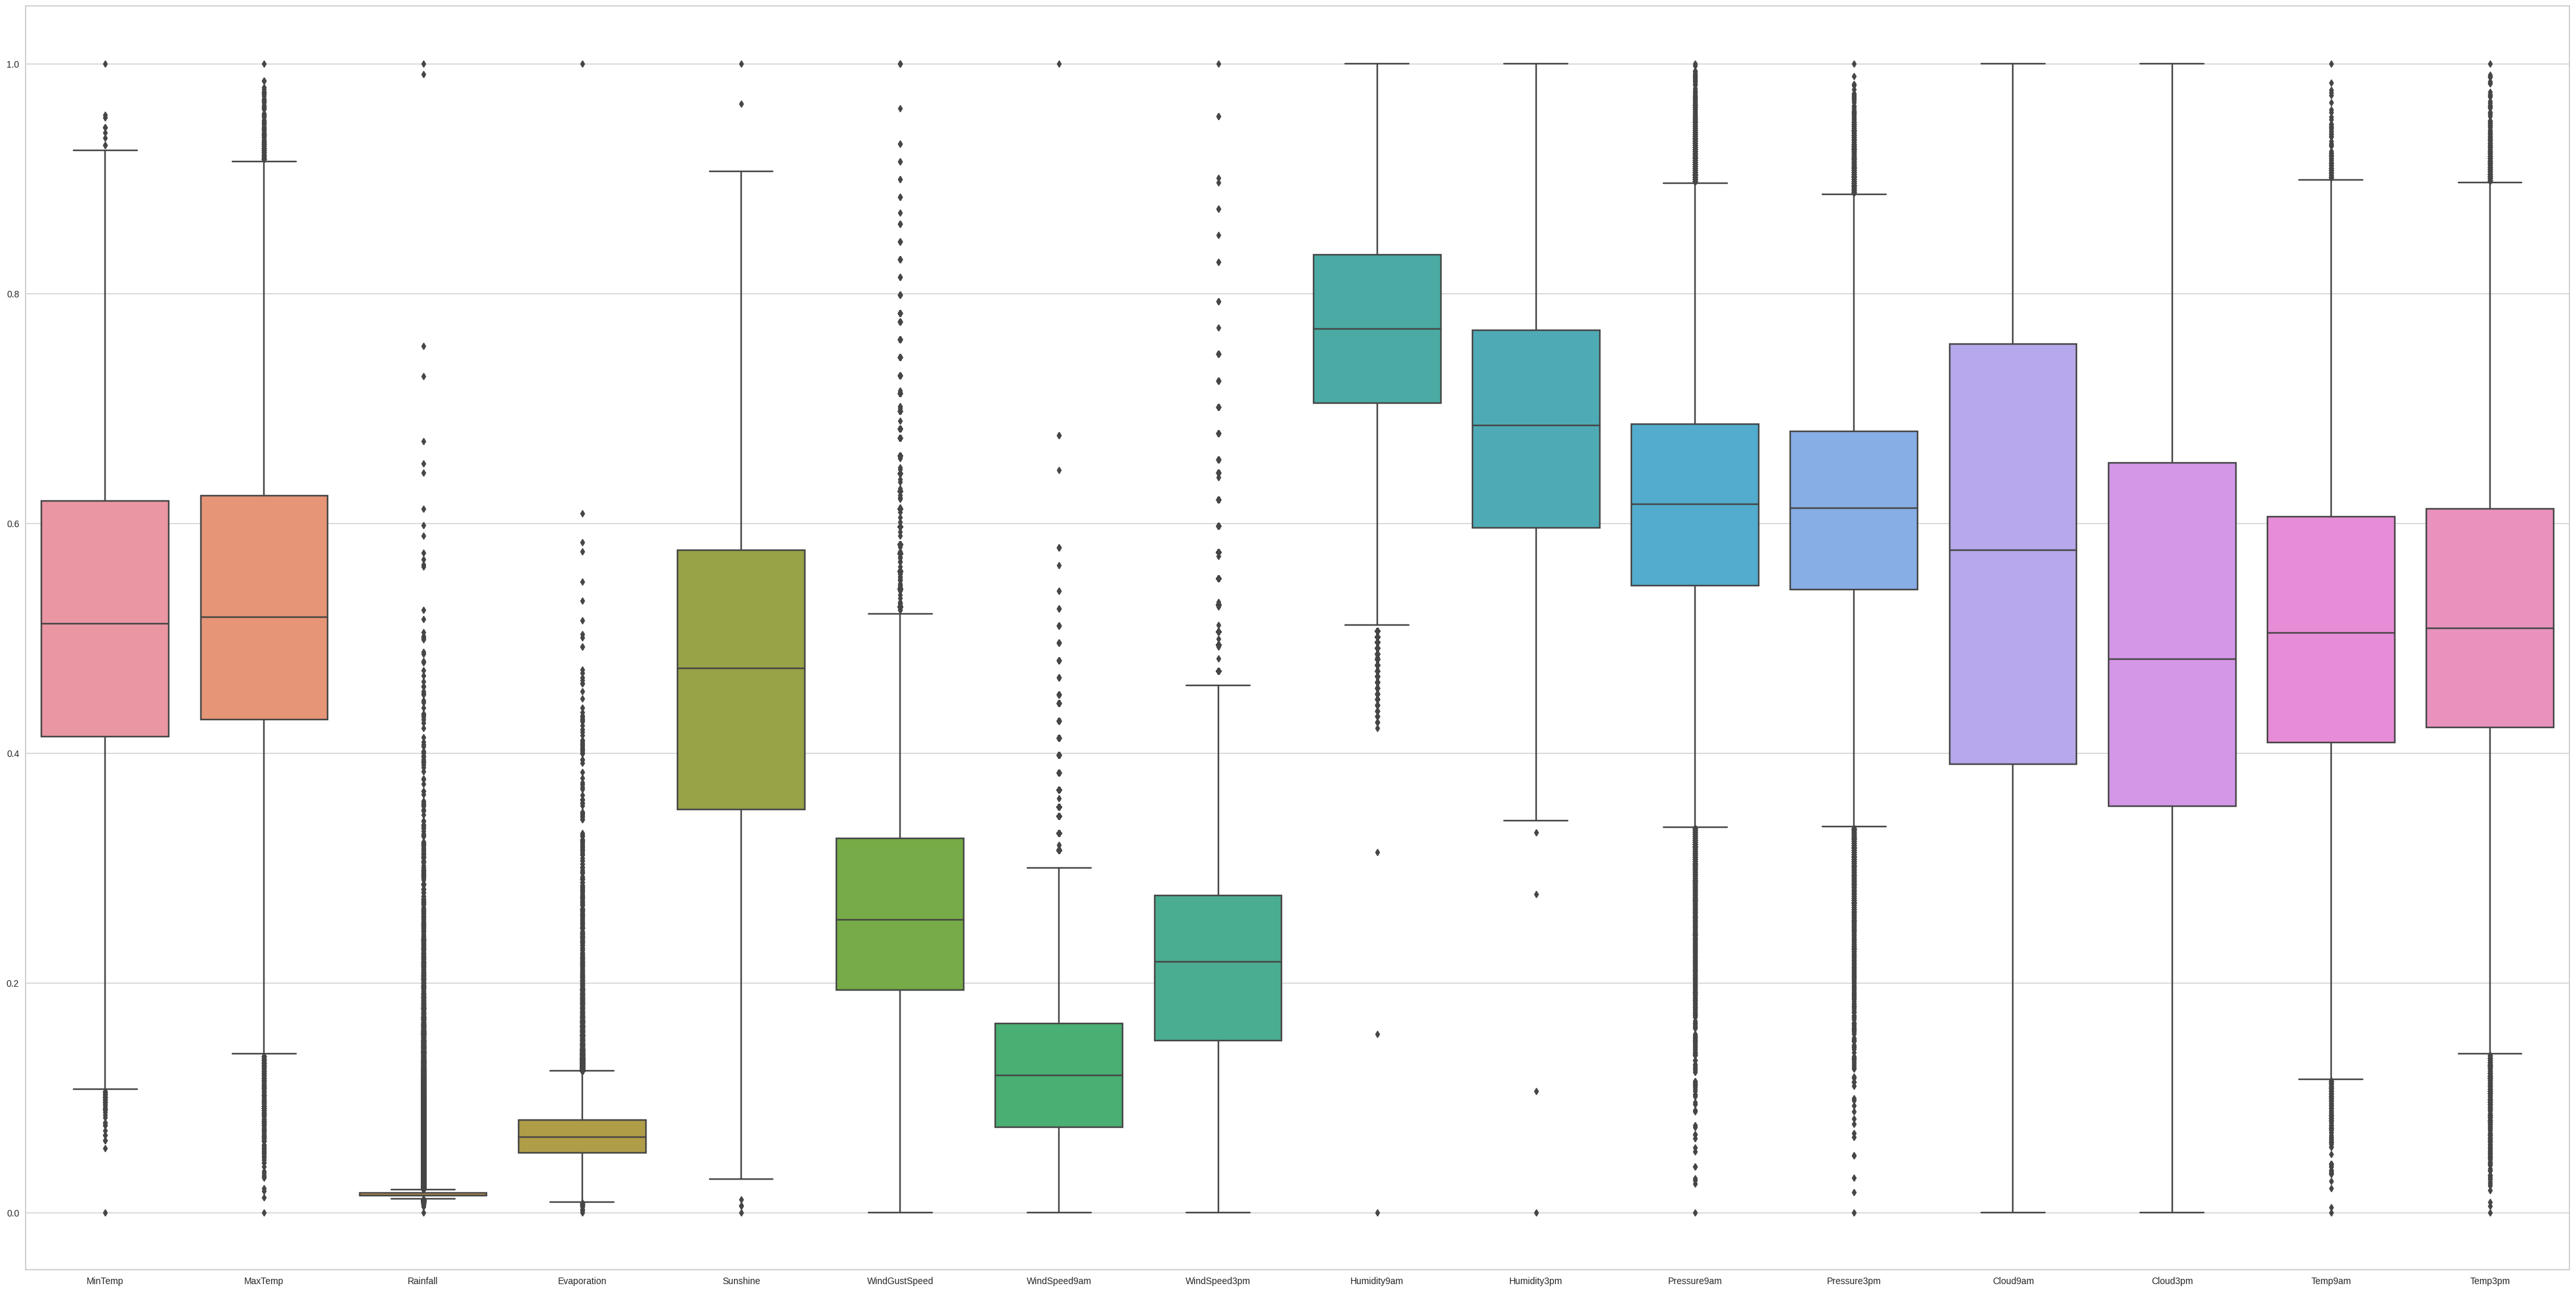

In [ ]:
plt.figure(figsize=(50,25))
sns.boxplot(data=df_scaled[num_features])

Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, Windspeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm have substantial outliers

## Do the training and test sets have the same data?

In [ ]:
X = df_scaled.drop(['RainTomorrow'], axis=1)

y = df_scaled['RainTomorrow']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(113754, 24)
(28439, 24)


No, by looking at the shape of data training and test sets have different data. They are divided with 80:20 ratio

###Random Forest Classifier




In [ ]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train, y_train)

In [ ]:
print("Best features chosen by RFE: \n")

for i in X_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

MinTemp
MaxTemp
Sunshine
WindGustSpeed
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm


Confusion Matrix: [[21168   899]
 [ 2442  3930]]
True Positives(TP) =  21168
True Negatives(TN) =  3930
False Positives(FP) =  899
False Negatives(FN) =  2442
Classification accuracy : 0.8825
Classification error : 0.1175


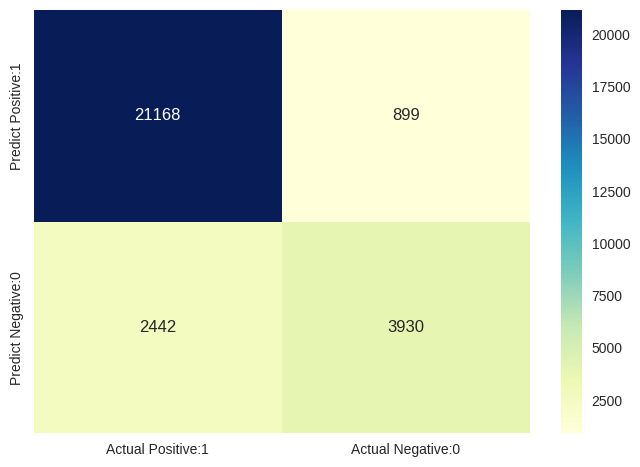

In [ ]:
y_pred = rfe.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:" ,cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# print classification accuracy
classification_accuracy = (cm[0,0] + cm[1,1]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (cm[0,1] + cm[1,0]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print('Classification error : {0:0.4f}'.format(classification_error))

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
logistic_reg_model = LogisticRegression()

# Train the model on the training data
logistic_reg_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_reg_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     22067
         1.0       0.74      0.56      0.64      6372

    accuracy                           0.86     28439
   macro avg       0.81      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439

Confusion Matrix:
 [[20826  1241]
 [ 2813  3559]]


We can anticipate that the RandomForestClassification model is likely to achieve a higher accuracy score, approximately 88%, compared to the Logistic Regression model, which is expected to yield an accuracy of around 86%.

## Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [ ]:
df_Oclean = df_scaled.copy()

In [ ]:
def remove_out(df_Oclean, num_cols, lbv=0.25, hbv=0.75):
    Q1 = df_Oclean[num_cols].quantile(lbv)
    Q3 = df_Oclean[num_cols].quantile(hbv)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    hb = Q3+1.5*IQR
    for i in num_cols:
        df_Oclean = df_Oclean[(df_Oclean[i]>=lb[i]) & (df_Oclean[i]<=hb[i])]
    return df_Oclean

In [ ]:
cols_outliers = ['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Evaporation', 'Sunshine','RainToday', 'RainTomorrow']

In [ ]:
df_clean = remove_out(df_Oclean, cols_outliers, lbv=0.10, hbv=0.90)
df_clean.shape

(135751, 25)

In [ ]:
X_new = df_clean.drop(['RainTomorrow'], axis=1)

y_new = df_clean['RainTomorrow']

In [ ]:
X_new.shape

(135751, 24)

In [ ]:
# split X_new and y_new into training and testing sets

from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train_new.shape)
print(X_test_new.shape)

(108600, 24)
(27151, 24)


In [ ]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_new, y_train_new)

Confusion Matrix: [[20832   817]
 [ 2328  3174]]
True Positives(TP) =  20832
True Negatives(TN) =  3174
False Positives(FP) =  817
False Negatives(FN) =  2328
Classification accuracy : 0.8842
Classification error : 0.1158


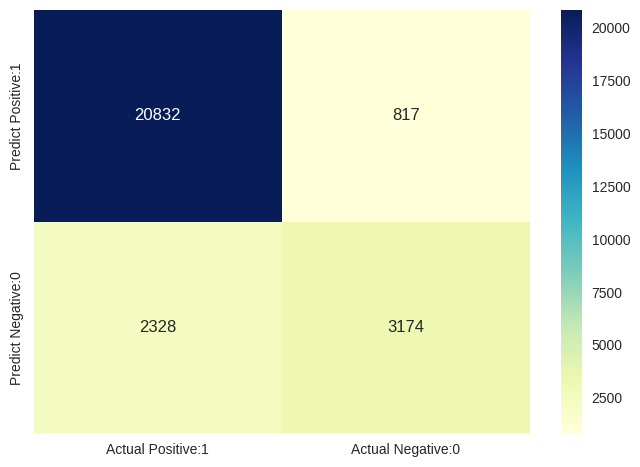

In [ ]:
y_pred_new = rfe.predict(X_test_new)
# Create the confusion matrix
cm1 = confusion_matrix(y_test_new, y_pred_new)

# Print the confusion matrix
print("Confusion Matrix:" ,cm1)
print('True Positives(TP) = ', cm1[0,0])
print('True Negatives(TN) = ', cm1[1,1])
print('False Positives(FP) = ', cm1[0,1])
print('False Negatives(FN) = ', cm1[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='YlGnBu')

# print classification accuracy
classification_accuracy1 = (cm1[0,0] + cm1[1,1]) / float(cm1[0,0] + cm1[1,1] + cm1[0,1] + cm1[1,0])
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy1))

# print classification error
classification_error1 = (cm1[0,1] + cm1[1,0]) / float(cm1[0,0] + cm1[1,1] + cm1[0,1] + cm1[1,0])
print('Classification error : {0:0.4f}'.format(classification_error1))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy2 = accuracy_score(y_test_new, y_pred_new)
print(f'Accuracy: {accuracy2:.2f}')

# Generate a classification report
report2 = classification_report(y_test_new, y_pred_new)
print('Classification Report:\n', report2)

# Create a confusion matrix
cm2 = confusion_matrix(y_test_new, y_pred_new)
print('Confusion Matrix:\n', cm2)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     21649
         1.0       0.80      0.58      0.67      5502

    accuracy                           0.88     27151
   macro avg       0.85      0.77      0.80     27151
weighted avg       0.88      0.88      0.88     27151

Confusion Matrix:
 [[20832   817]
 [ 2328  3174]]


Upon removing outliers, we observed a notable improvement in the accuracy score, reaching 89%. This enhancement underscores the significant impact of outliers on the final predictive model's performance.

## Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
# remove 1%
n=round(0.99*len(df_scaled))
red_data1 = df_scaled.sample(n=n)

# remove 5%
n=round(0.95*len(df_scaled))
red_data5 = df_scaled.sample(n=n)

# remove 10%
n=round(0.90*len(df_scaled))
red_data10 = df_scaled.sample(n=n)

###Data imputation using mode

Data imputation using the mode involves replacing missing values in a dataset with the most frequently occurring value (mode) in the respective column. This imputation method is commonly used for categorical variables and discrete data. It helps maintain the distribution of the variable while filling in missing entries with the most common category.

In [ ]:
imputed_data1 = red_data1.copy(deep=True)
for col in imputed_data1.columns:
  imputed_data1[col] = imputed_data1[col].fillna(imputed_data1[col].mode()[0])

imputed_data5 = red_data5.copy(deep=True)
for col in imputed_data5.columns:
  imputed_data5[col] = imputed_data5[col].fillna(imputed_data5[col].mode()[0])


imputed_data10 = red_data10.copy(deep=True)
for col in imputed_data10.columns:
  imputed_data10[col] = imputed_data10[col].fillna(imputed_data10[col].mode()[0])

In [ ]:
X1 = imputed_data1.drop(['RainTomorrow'], axis=1)

y1 = imputed_data1['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

NameError: ignored

In [ ]:
X = imputed_data5.drop(['RainTomorrow'], axis=1)

y = imputed_data5['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.879705370692527
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     20951
         1.0       0.81      0.61      0.69      6066

    accuracy                           0.88     27017
   macro avg       0.85      0.78      0.81     27017
weighted avg       0.87      0.88      0.87     27017

Confusion Matrix:
 [[20078   873]
 [ 2377  3689]]


In [ ]:
X = imputed_data10.drop(['RainTomorrow'], axis=1)

y = imputed_data10['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8802891189685486
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     19751
         1.0       0.82      0.61      0.70      5844

    accuracy                           0.88     25595
   macro avg       0.86      0.79      0.81     25595
weighted avg       0.88      0.88      0.87     25595

Confusion Matrix:
 [[18959   792]
 [ 2272  3572]]


### Data imputation using median

Data imputation using the median involves replacing missing values in a dataset with the median value of the respective column. This imputation method is commonly used for continuous numerical variables and is robust to outliers. It helps maintain the central tendency of the data while filling in missing entries with a representative value.

In [ ]:
imputed_data1 = red_data1.copy(deep=True)
for col in imputed_data1.columns:
  imputed_data1[col] = imputed_data1[col].fillna(imputed_data1[col].median())

imputed_data5 = red_data5.copy(deep=True)
for col in imputed_data5.columns:
  imputed_data5[col] = imputed_data_5[col].fillna(imputed_data5[col].median())


imputed_data10 = red_data10.copy(deep=True)
for col in imputed_data10.columns:
  imputed_data10[col] = imputed_data10[col].fillna(imputed_data10[col].median())

In [ ]:
X = imputed_data1.drop(['RainTomorrow'], axis=1)

y = imputed_data1['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.88151305274374
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     21930
         1.0       0.80      0.62      0.70      6225

    accuracy                           0.88     28155
   macro avg       0.85      0.79      0.81     28155
weighted avg       0.88      0.88      0.88     28155

Confusion Matrix:
 [[20981   949]
 [ 2387  3838]]


In [ ]:
X = imputed_data5.drop(['RainTomorrow'], axis=1)

y = imputed_data5['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8789650960506348
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     20951
         1.0       0.81      0.60      0.69      6066

    accuracy                           0.88     27017
   macro avg       0.85      0.78      0.81     27017
weighted avg       0.87      0.88      0.87     27017

Confusion Matrix:
 [[20088   863]
 [ 2407  3659]]


In [ ]:
X = imputed_data10.drop(['RainTomorrow'], axis=1)

y = imputed_data10['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8797030670052745
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     19751
         1.0       0.82      0.61      0.70      5844

    accuracy                           0.88     25595
   macro avg       0.85      0.79      0.81     25595
weighted avg       0.88      0.88      0.87     25595

Confusion Matrix:
 [[18943   808]
 [ 2271  3573]]


### Data imputation using MICE

Data imputation using the Multiple Imputation by Chained Equations (MICE) iterative method is a technique for handling missing data by imputing values through a series of predictive models. It's particularly useful when dealing with datasets where missing values are not completely at random and when you want to preserve the relationships between variables.

In [ ]:
imputed_data1 = red_data1.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data1.iloc[:, :] = mice_imputer.fit_transform(reduced_data1)

imputed_data5 = red_data5.copy(deep=True)
imputed_data5.iloc[:, :] = mice_imputer.fit_transform(reduced_data5)

imputed_data10 = red_data10.copy(deep=True)
imputed_data10.iloc[:, :] = mice_imputer.fit_transform(reduced_data10)

In [ ]:
X = imputed_data1.drop(['RainTomorrow'], axis=1)

y = imputed_data1['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8814420174036584
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     21930
         1.0       0.80      0.62      0.70      6225

    accuracy                           0.88     28155
   macro avg       0.85      0.79      0.81     28155
weighted avg       0.88      0.88      0.88     28155

Confusion Matrix:
 [[20981   949]
 [ 2389  3836]]


In [ ]:
X = imputed_data5.drop(['RainTomorrow'], axis=1)

y = imputed_data5['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8794832882999593
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     20951
         1.0       0.81      0.61      0.69      6066

    accuracy                           0.88     27017
   macro avg       0.85      0.78      0.81     27017
weighted avg       0.87      0.88      0.87     27017

Confusion Matrix:
 [[20070   881]
 [ 2375  3691]]


In [ ]:
X = imputed_data10.drop(['RainTomorrow'], axis=1)

y = imputed_data10['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8785309630787264
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     19751
         1.0       0.81      0.61      0.70      5844

    accuracy                           0.88     25595
   macro avg       0.85      0.78      0.81     25595
weighted avg       0.87      0.88      0.87     25595

Confusion Matrix:
 [[18941   810]
 [ 2299  3545]]


* Which independent variables are useful to predict a target (dependent variable)?
As observed earlier, all variables demonstrate a significant influence on the target variable. However, for predictive modeling, the following variables have been identified as particularly valuable:
1) MinTemp
2) MaxTemp
3) Sunshine
4) WindGustSpeed
5) Humidity3pm
6) Pressure9am
7) Pressure3pm
8) Cloud9am
9) Cloud3pm
10) Temp3pm

* Which independent variable have missing data? How much?
>Among the variables, Pressure9am, Pressure3pm, and sunshine exhibit a relatively higher rate of missing data, ranging from 30% to 50%. In contrast, the remaining variables demonstrate a lower prevalence of missing values.

* Do the training and test sets have the same data?
>The training and test sets are characterized by distinct data ranges, and they have been partitioned in an 80:20 ratio.

* In the predictor variables independent of all the other predictor variables?
>No, instead we have observed robust correlations among predictor variables themselves.

* Which predictor variables are the most important?
>RainToday, Cloud3pm, Cloud9am, Humidity3pm, Humidity9am, WindGustSpeed and Rainfall are most important variable for predicting taget.

* Do the ranges of the predictor variables make sense?
> yes, looking at boxplot we can infer that ranges of predictor variables makes sense

* What are the distributions of the predictor variables?
>*   Bimodal Distributions: Sunshine, Cloud9am, Cloud3pm
 *   Exponential Distributions: Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm
 *   Skewed Normal Distributions: MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm


#**2. AutoML**

In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=e18b07f966c4f15e766c93b6135fa51c0ddd8f9e975a2578695543ea5df11382
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
min_mem_size=6
run_time=240
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))

In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:18642..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_vmm2orf
  JVM stdout: /tmp/tmp_vmm2orf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_vmm2orf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:18642
Connecting to H2O server at http://127.0.0.1:18642 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    1 month and 3 days
H2O_cluster_name:           H2O_from_python_unknownUser_x9jbdx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:18642
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

##Initializing H2O

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyce8jutn
  JVM stdout: /tmp/tmpyce8jutn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyce8jutn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    1 month and 3 days
H2O_cluster_name:           H2O_from_python_unknownUser_0ofv3x
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

### Convert Pandas DataFrame to H2O DataFrame

In [ ]:
data_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This will convert pandas dataframe into H2O dataframe allowing to perform machine learning tasks using H2O's capabilities.

### Describe statistical properties and types

In [ ]:
data_h2o.describe()

Rows:145460
Cols:23

Date                 Location    MinTemp            MaxTemp             Rainfall           Evaporation    Sunshine    WindGustDir    WindGustSpeed       WindDir9am    WindDir3pm    WindSpeed9am        WindSpeed3pm       Humidity9am         Humidity3pm         Pressure9am         Pressure3pm         Cloud9am            Cloud3pm            Temp9am             Temp3pm            RainToday    RainTomorrow
-------  -------------------  ----------  -----------------  ------------------  -----------------  -------------  ----------  -------------  ------------------  ------------  ------------  ------------------  -----------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  -----------------  -----------  --------------
type     time                 enum        real               real                real               enum           enum        enum           int                 enum          enum          int                 int                int                 int                 real                real                int                 int                 real                real               enum         enum
mins     1193875200000.0                  -8.5               -4.8                0.0                                                          6.0                                             0.0                 0.0                0.0                 0.0                 980.5               977.1               0.0                 0.0                 -7.2                -5.4
mean     1365109731907.0562               12.19403438096891  23.221348275646772  2.360918149916665                                            40.035230071673084                              14.043425914971541  18.66265677888735  68.88083133761897   51.539115875504436  1017.6499397983034  1015.2558888309627  4.447461260215234   4.509930082924911   16.990631415587405  21.68339031800974
maxs     1498348800000.0                  33.9               48.1                371.0                                                        135.0                                           130.0               87.0               100.0               100.0               1041.0              1039.6              9.0                 9.0                 40.2                46.7
sigma    79576380749.1083                 6.398494975663226  7.11904884597913    8.47805973772637                                             13.607062267381348                              8.91537532267955    8.809800021251469  19.029164451844157  20.795901656021154  7.106530287522908   7.0374138081680115  2.8871588535172417  2.7203573103324556  6.48875314087728    6.936650460035525
zeros    0                                159                14                  91080                                                        0                                               8745                1112               1                   4                   0                   0                   8642                4974                36                  17
missing  0                    0           1485               1261                3261               0              0           0              10263               0             0             1767                3062               2654                4507                15065               15028               55888               59358               1767                3609               0            0
0        2008-12-01 00:00:00  Albury      13.4               22.9                0.6                nan            nan         W              44.0                W             WNW           20.0                24.0               71.0                22.0                1007.7              1007.1              8.0                 nan                 16.9                21.8               No           No
1        2008-12-02 00:00:00  Albury      7.4                25.1       

In [ ]:
data_h2o.types

{'Date': 'time',
 'Location': 'enum',
 'MinTemp': 'real',
 'MaxTemp': 'real',
 'Rainfall': 'real',
 'Evaporation': 'enum',
 'Sunshine': 'enum',
 'WindGustDir': 'enum',
 'WindGustSpeed': 'int',
 'WindDir9am': 'enum',
 'WindDir3pm': 'enum',
 'WindSpeed9am': 'int',
 'WindSpeed3pm': 'int',
 'Humidity9am': 'int',
 'Humidity3pm': 'int',
 'Pressure9am': 'real',
 'Pressure3pm': 'real',
 'Cloud9am': 'int',
 'Cloud3pm': 'int',
 'Temp9am': 'real',
 'Temp3pm': 'real',
 'RainToday': 'enum',
 'RainTomorrow': 'enum'}

In [ ]:
data_h2o['RainTomorrow'] = data_h2o['RainTomorrow'].asfactor()

Here, "RainTomorrow" column in H2O data frame is converted to a categorical or factor variable for binary classification, which is common in tasks where we can predict whether it will rain tomorrow or not.

In [ ]:
data_h2o['RainTomorrow'].unique()

C1
----
No
Yes
nan
[3 rows x 1 column]

## Split dataframe to train and test

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
autoDf_train, autoDf_test = data_h2o.split_frame([pct_rows])

#Check the shape of train and test data
print(autoDf_train.shape)
print(autoDf_test.shape)

(116503, 23)
(28957, 23)


In [ ]:
#Display all columns in X
X_auto=data_h2o.columns
print(X_auto)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='RainTomorrow'
X_auto.remove(y_numeric)
print(X_auto)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


## H2O AutoML

In [ ]:
#set the AutoML
aml = H2OAutoML(max_runtime_secs=600, stopping_metric="AUC", max_models=10, seed=1, nfolds=4)

#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_5_20231103_03009


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  9/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    4
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0533772772332221
RMSE: 0.23103522942015164
LogLoss: 0.19000641021245102
AUC: 0.977271133451704
AUCPR: 0.9366125503736745
Gini: 0.954542266903408
Null degrees of freedom: 9976
Residual degrees of freedom: 9967
Null deviance: 10476.211879918646
Residual deviance: 3791.3879093792475
AIC: 3811.3879093792475

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3730670206022809
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     7431  366    0.0469   (366.0/7797.0)
Yes    287   1893   0.1317   (287.0/2180.0)
Total  7718  2259   0.0655   (653.0/9977.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.373067     0.852895  199
max f2                       0.29141      0.882145  226
max f0point5                 0.544806     0.885773  143
max accuracy                 0.437679     0.937055  178
max precision                0.994777     1         0
max recall                   0.0170904    1         378
max specificity              0.994777     1         0
max absolute_mcc             0.416973     0.811989  184
max min_per_class_accuracy   0.28905      0.918349  227
max mean_per_class_accuracy  0.317919     0.919423  216
max tns                      0.994777     7797      0
max fns                      0.994777     2159      0
max fps                      0.00173242   7797      399
max tps                      0.0170904    2180      378
max tnr                      0.994777     1         0
max fnr                      0.994777     0.990367  0
max fpr                      0.00173242   1         399
max tpr                      0.0170904    1         378

Gains/Lift Table: Avg response rate: 21.85 %, avg score: 22.16 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100231                   0.979785           4.57661     4.57661            1                0.989775    1                           0.989775            0.0458716       0.0458716                  357.661   357.661            0.0458716
2        0.0200461                   0.964626           4.57661     4.57661            1                0.971105    1                           0.98044             0.0458716       0.0917431                  357.661   357.661            0.0917431
3        0.0300692                   0.947033           4.57661     4.57661            1                0.955891    1                           0.972257            0.0458716       0.137615                   357.661   357.661            0.137615
4        0.0400922                   0.927537           4.57661     4.57661            1                0.

The model key for this stacked ensemble is "StackedEnsemble_AllModels_1_AutoML_3_20231102_234311". Below is a summary of the key information and performance metrics:

*   Model Type: StackedEnsemble

    Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231102_234311


*   **ModelMetricsBinomialGLM on Train Data**:
    
    Mean Squared Error (MSE): 0.0544

    Root Mean Squared Error (RMSE): 0.2332
    
    Log Loss: 0.1924
    
    Area Under the Receiver Operating Characteristic Curve (AUC): 0.9766

    Area Under the Precision-Recall Curve (AUCPR): 0.9352


*   **Confusion Matrix on Train Data:**

    True Negatives (TN): 7402

    False Positives (FP): 359

    False Negatives (FN): 299

    True Positives (TP): 1909


*   **ModelMetricsBinomialGLM on Cross-Validation Data:**

    Mean Squared Error (MSE): 0.0955

    Root Mean Squared Error (RMSE): 0.3091

    Log Loss: 0.3069

    Area Under the Receiver Operating Characteristic Curve (AUC): 0.9054

    Area Under the Precision-Recall Curve (AUCPR): 0.7678


This stacked ensemble model demonstrates strong predictive performance on both the training and cross-validation datasets, as indicated by high AUC and AUCPR values. The model combines predictions from a variety of base models, effectively utilizing their diverse strengths to improve overall performance.

## Display Leaderboard

In [ ]:
lb = aml.leaderboard
lb

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009     0.905492   0.305268  0.767298                0.192881  0.308127  0.0949425
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009  0.902965   0.308586  0.763463                0.19622   0.309869  0.0960187
GBM_2_AutoML_5_20231103_03009                           0.899691   0.315496  0.756113                0.200091  0.312274  0.097515
GBM_1_AutoML_5_20231103_03009                           0.899575   0.315907  0.755086                0.201314  0.312715  0.0977906
GBM_3_AutoML_5_20231103_03009                           0.898116   0.317314  0.750872                0.203402  0.31348   0.0982699
XGBoost_3_AutoML_5_20231103_03009                       0.89804    0.315231  0.75345                 0.200791  0.31339   0.0982133
GBM_4_AutoML_5_20231103_03009                           0.89777    0.319007  0.749717                0.200542  0.314957  0.0991976
DRF_1_AutoML_5_20231103_03009                           0.895702   0.340647  0.747494                0.200177  0.31564   0.0996284
XGBoost_2_AutoML_5_20231103_03009                       0.893917   0.325405  0.740755                0.206399  0.318366  0.101357
XGBoost_1_AutoML_5_20231103_03009                       0.893317   0.326573  0.739417                0.211226  0.318616  0.101516
[12 rows x 7 columns]

The top-performing model is the "StackedEnsemble_AllModels_1," which achieved the highest AUC (Area Under the ROC Curve) of 0.9054. AUC is a measure of a model's ability to distinguish between positive and negative classes, with higher values indicating better performance.

AUC-PR: The "StackedEnsemble_AllModels_1" model also has the highest AUC-PR (Area Under the Precision-Recall Curve) of 0.7678. AUC-PR measures a model's precision and recall performance, particularly important when dealing with imbalanced datasets.

In this leaderboard, the best performing model is:
The "StackedEnsemble_AllModels_1" outperforms other

1.   StackedEnsemble_AllModels_1
2.   StackedEnsemble_BestOfFamily_1


In summary, the "StackedEnsemble_AllModels_1" appears to be the best model for the binary classification task of predicting whether it will rain tomorrow, based on the provided performance metrics.

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns="ALL")
lb

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009     0.905492   0.305268  0.767298                0.192881  0.308127  0.0949425               15313                   0.046893  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009  0.902965   0.308586  0.763463                0.19622   0.309869  0.0960187               14076                   0.061486  StackedEnsemble
GBM_2_AutoML_5_20231103_03009                           0.899691   0.315496  0.756113                0.200091  0.312274  0.097515                 1815                   0.006442  GBM
GBM_1_AutoML_5_20231103_03009                           0.899575   0.315907  0.755086                0.201314  0.312715  0.0977906                2765                   0.007755  GBM
GBM_3_AutoML_5_20231103_03009                           0.898116   0.317314  0.750872                0.203402  0.31348   0.0982699                2054                   0.006949  GBM
XGBoost_3_AutoML_5_20231103_03009                       0.89804    0.315231  0.75345                 0.200791  0.31339   0.0982133                2140                   0.001896  XGBoost
GBM_4_AutoML_5_20231103_03009                           0.89777    0.319007  0.749717                0.200542  0.314957  0.0991976                2680                   0.008291  GBM
DRF_1_AutoML_5_20231103_03009                           0.895702   0.340647  0.747494                0.200177  0.31564   0.0996284                6207                   0.014256  DRF
XGBoost_2_AutoML_5_20231103_03009                       0.893917   0.325405  0.740755                0.206399  0.318366  0.101357                 3176                   0.002614  XGBoost
XGBoost_1_AutoML_5_20231103_03009                       0.893317   0.326573  0.739417                0.211226  0.318616  0.101516                 6291                   0.002845  XGBoost
[12 rows x 10 columns]

##Compare Models

model_id                                                  auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009  0.905492   0.305268  0.767298                0.192881  0.308127  0.0949425               15313                   0.046893  StackedEnsemble
GBM_2_AutoML_5_20231103_03009                        0.899691   0.315496  0.756113                0.200091  0.312274  0.097515                 1815                   0.006442  GBM
XGBoost_3_AutoML_5_20231103_03009                    0.89804    0.315231  0.75345                 0.200791  0.31339   0.0982133                2140                   0.001896  XGBoost
GLM_1_AutoML_5_20231103_03009                        0.890654   0.327102  0.7322                  0.204948  0.319274  0.101936                 2398                   0.00079   GLM
[4 rows x 10 columns]

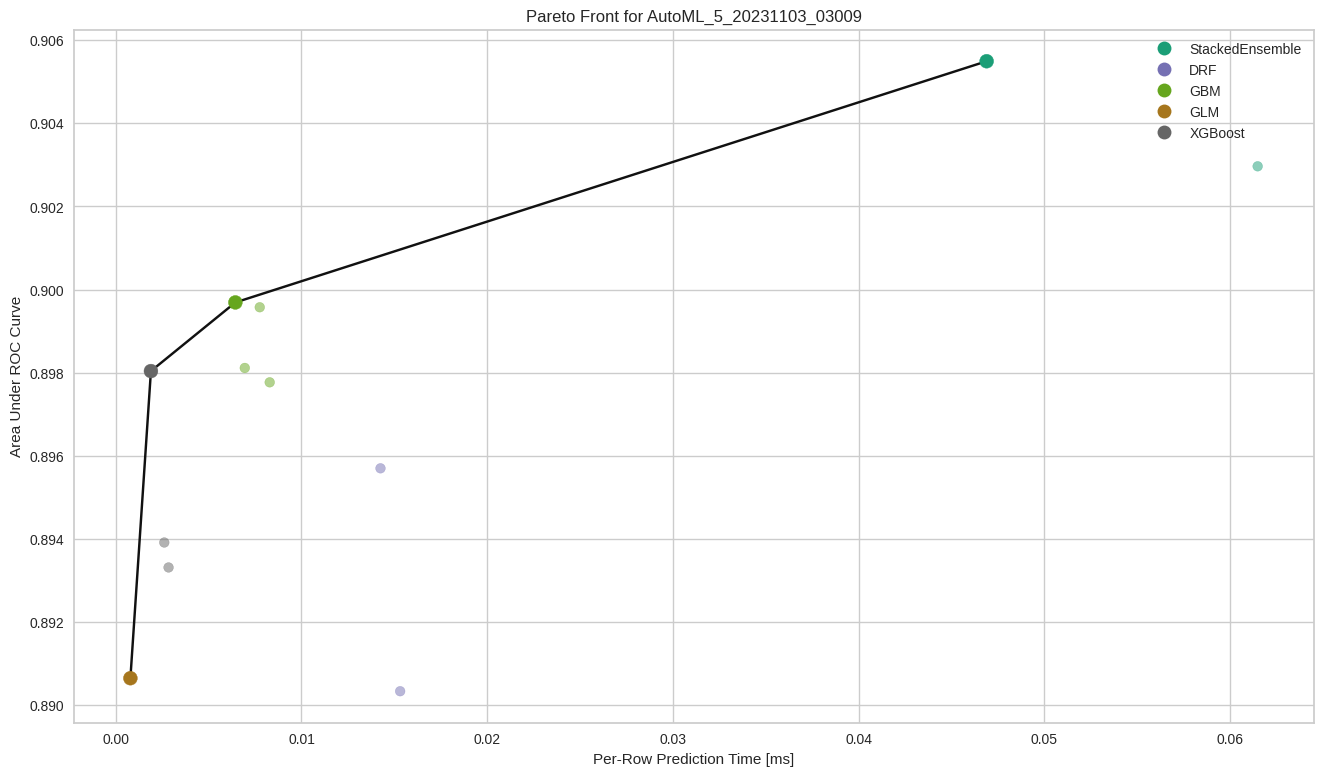

In [ ]:
pf = aml.pareto_front()
pf.figure()
pf

The Stacked Ensemble model shows the highest AUC (0.9055) and AUC-PR (0.7673), indicating excellent predictive performance. It also has the lowest log loss (0.3053) and Mean Squared Error (MSE) of 0.0949.

The Gradient Boosting Machine (GBM) and XGBoost models also perform well, with competitive AUC values (0.8997 and 0.8980, respectively).

The Stacked Ensemble has the lowest mean per class error (0.1929), indicating that it provides balanced and accurate predictions across different classes.

The prediction time per row is fastest for XGBoost (0.0019 ms per row), making it efficient for real-time or large-scale prediction tasks. GLM is also quite efficient in terms of prediction time.

GBM and XGBoost offer a good balance between predictive accuracy and efficiency, making them practical choices for many real-world scenarios.

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_5_20231103_03009': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009': 1,
 'GBM_2_AutoML_5_20231103_03009': 2,
 'GLM_1_AutoML_5_20231103_03009': 10}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [ ]:
best_model.algo

'gbm'

In [ ]:
best_model.train(x=X,y=y_numeric,training_frame=df_train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1698942143345_7972


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22051                  5            5            5             23            32            30.42

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0884861799807316
RMSE: 0.2974662669627123
LogLoss: 0.2905357848102206
Mean Per-Class Error: 0.18085577722752905
AUC: 0.9174212832491628
AUCPR: 0.8016730117031001
Gini: 0.8348425664983257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3391354326777375
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     31769  3290   0.0938   (3290.0/35059.0)
Yes    2657   7262   0.2679   (2657.0/9919.0)
Total  34426  10552  0.1322   (5947.0/44978.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.339135     0.709491  207
max f2                       0.164537     0.778461  285
max f0point5                 0.571951     0.755806  128
max accuracy                 0.441934     0.878096  170
max precision                0.97152      1         0
max recall                   0.0139603    1         396
max specificity              0.97152      1         0
max absolute_mcc             0.412069     0.630568  181
max min_per_class_accuracy   0.226917     0.832283  254
max mean_per_class_accuracy  0.231381     0.833902  252
max tns                      0.97152      35059     0
max fns                      0.97152      9905      0
max fps                      0.0112829    35059     399
max tps                      0.0139603    9919      396
max tnr                      0.97152      1         0
max fnr                      0.97152      0.998589  0
max fpr                      0.0112829    1         399
max tpr                      0.0139603    1         396

Gains/Lift Table: Avg response rate: 22.05 %, avg score: 22.07 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100049                   0.944114           4.52445     4.52445            0.997778         0.954271   0.997778                    0.954271            0.0452667       0.0452667                  352.445   352.445            0.0452381
2        0.0200098                   0.926813           4.5043      4.51438            0.993333         0.935438   0.995556                    0.944855            0.045065        0.0903317                  350.43    351.438            0.0902176
3        0.0300147                   0.907194           4.5043      4.51102            0.993333         0.91745    0.994815                    0.93572             0.045065        0.135397                   350.43    351.102            0.135197
4        0.0400196                   0.884131           4.3733      4.47659            0.964444         0.89641    0.987222                    0.925893            0.0437544       0.179151                   337.33    347.659            0.178495
5        0.0500022                   0.856366           4.35274     4.45186            0.959911         0.869936   0


True Positives (TP): 7262.0

True Negatives (TN): 31769.0

total number of predictions made (Total) :44978.0


Accuracy = (TP + TN) / Total
Accuracy = (7262.0 + 31769.0) / 44978.0

Calculating the accuracy value:

Accuracy = 39031.0 / 44978.0 ≈ 0.8674

So, the accuracy of the model with the above data is approximately 0.8674 or 86.74%. This means that the model correctly predicts the target variable in about **86.74%** of the cases on the training data.

##Examine Models

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

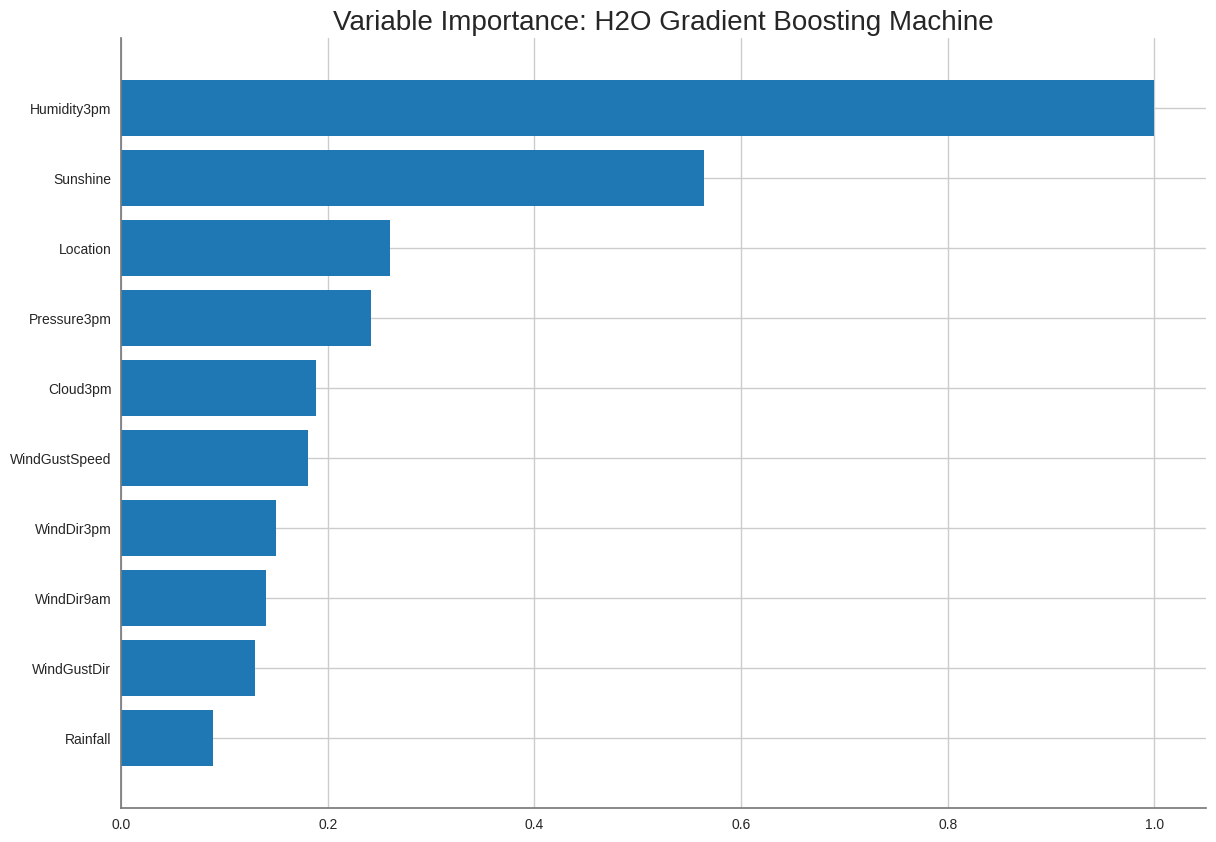

<Figure size 800x550 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()


The variable importance analysis suggests that "Humidity3pm" is the most influential feature among all the variables, with an importance score of 1.0. This signifies that changes in "Humidity3pm" have a substantial impact on the model's predictions. Additionally, "Sunshine" and "Location" are identified as the next two significant variables contributing to the model's performance. These findings imply that these features play a crucial role in determining the model's predictive accuracy of 'RainTomorrrow'

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009     0.900904   0.311617  0.754325                0.191074  0.311585  0.0970849               15313                   0.048894  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009  0.897974   0.315154  0.750173                0.193449  0.313294  0.0981534               14076                   0.040437  StackedEnsemble
GBM_1_AutoML_5_20231103_03009                           0.895271   0.320856  0.742398                0.19766   0.315757  0.0997027                2765                   0.008249  GBM
XGBoost_3_AutoML_5_20231103_03009                       0.894522   0.31972   0.742537                0.199133  0.315701  0.099667                 2140                   0.00247   XGBoost
GBM_2_AutoML_5_20231103_03009                           0.894385   0.321923  0.74221                 0.203057  0.316088  0.0999116                1815                   0.007536  GBM
GBM_3_AutoML_5_20231103_03009                           0.893983   0.322263  0.74118                 0.197759  0.316597  0.100234                 2054                   0.007443  GBM
GBM_4_AutoML_5_20231103_03009                           0.892469   0.32645   0.733596                0.203127  0.31923   0.101908                 2680                   0.009032  GBM
XGBoost_2_AutoML_5_20231103_03009                       0.890863   0.329245  0.729978                0.210468  0.320311  0.102599                 3176                   0.003031  XGBoost
DRF_1_AutoML_5_20231103_03009                           0.890861   0.346386  0.739009                0.212521  0.317631  0.100889                 6207                   0.015763  DRF
XGBoost_1_AutoML_5_20231103_03009                       0.890688   0.33003   0.732191                0.20211   0.320593  0.10278                  6291                   0.003452  XGBoost
XRT_1_AutoML_5_20231103_03009                           0.886331   0.331451  0.726974                0.202219  0.320544  0.102748                 8311                   0.014928  DRF
GLM_1_AutoML_5_20231103_03009                           0.884012   0.334161  0.718321                0.208723  0.322405  0.103945                 2398                   0.001261  GLM
[12 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_5_20231103_03009

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3124459555994696
       No    Yes    Error    Rate
-----  ----  -----  -------  ----------------
No     7846  1088   0.1218   (1088.0/8934.0)
Yes    653   1855   0.2604   (653.0/2508.0)
Total  8499  2943   0.1522   (1741.0/11442.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

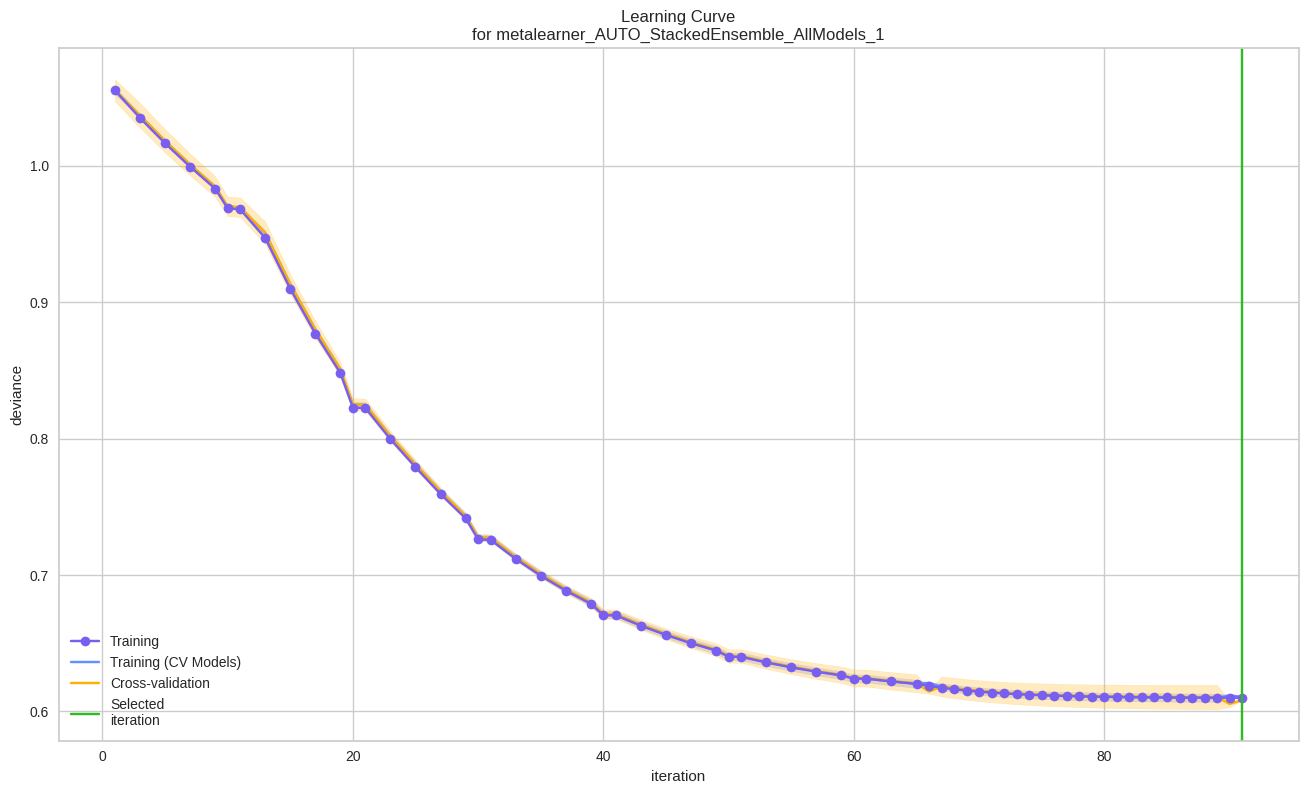

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

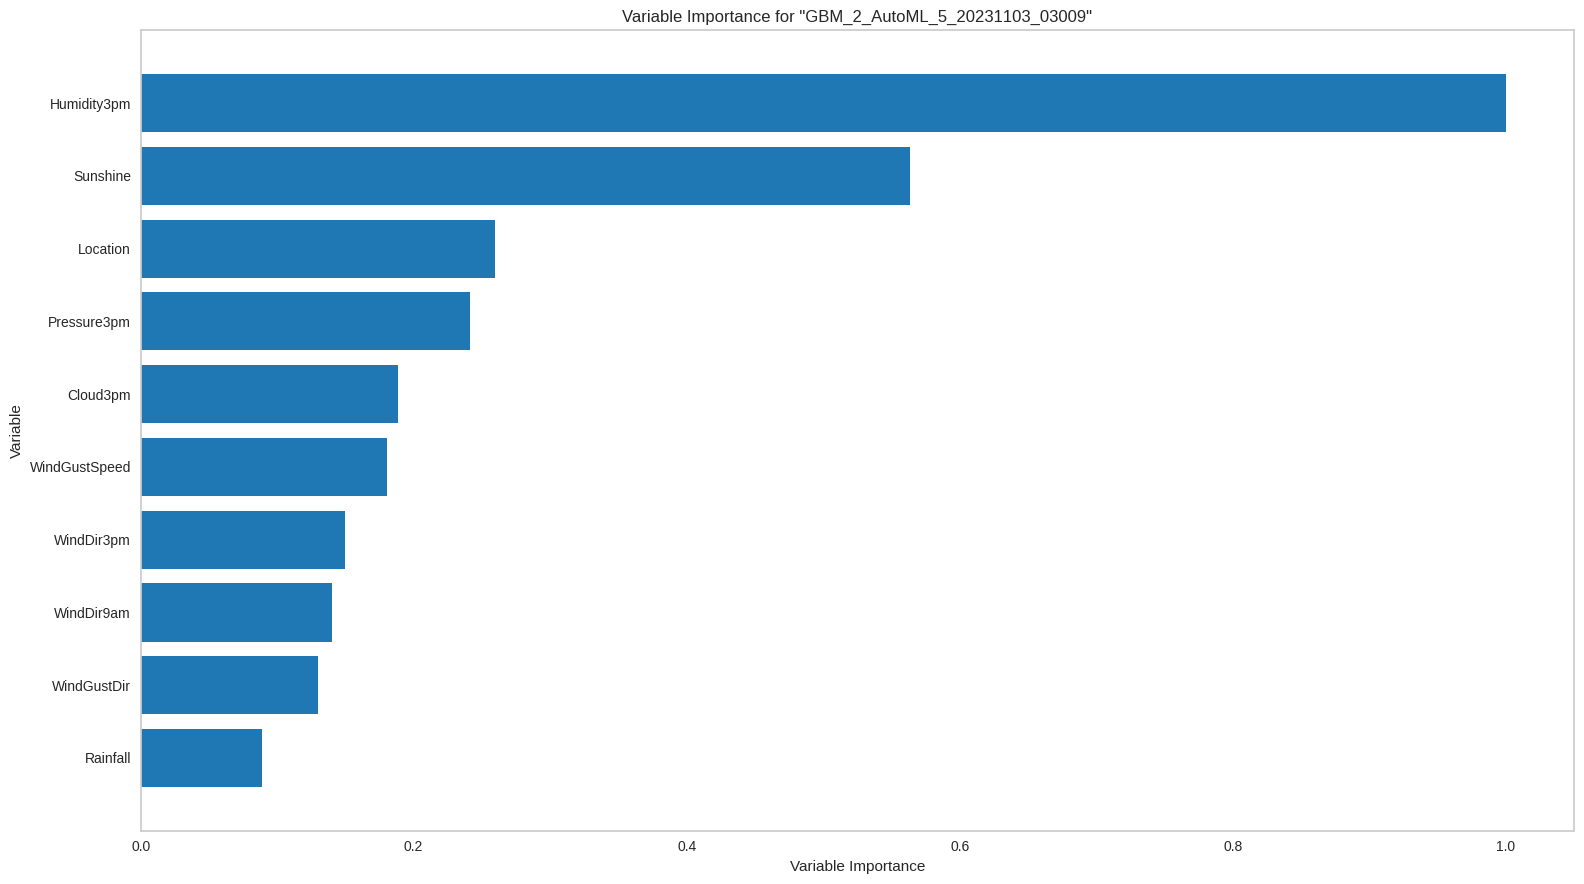

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

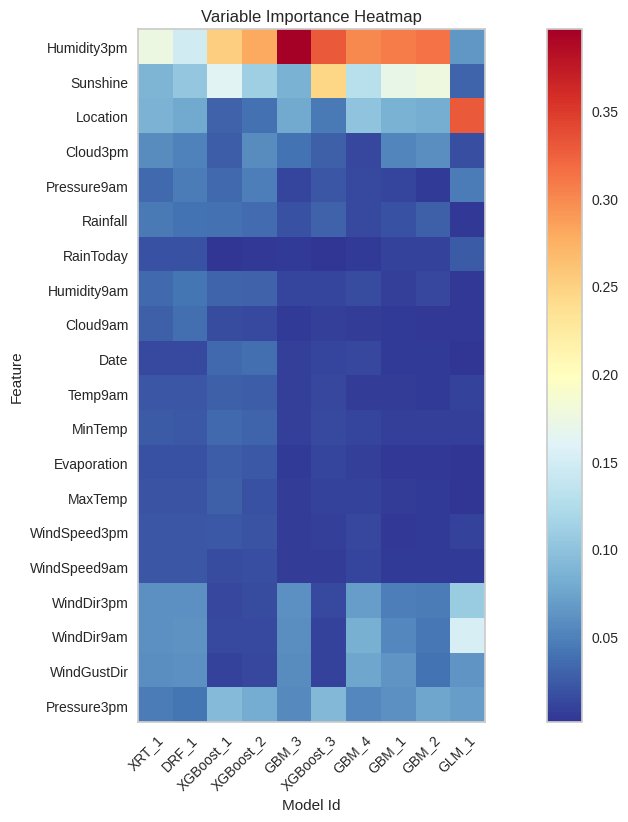

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

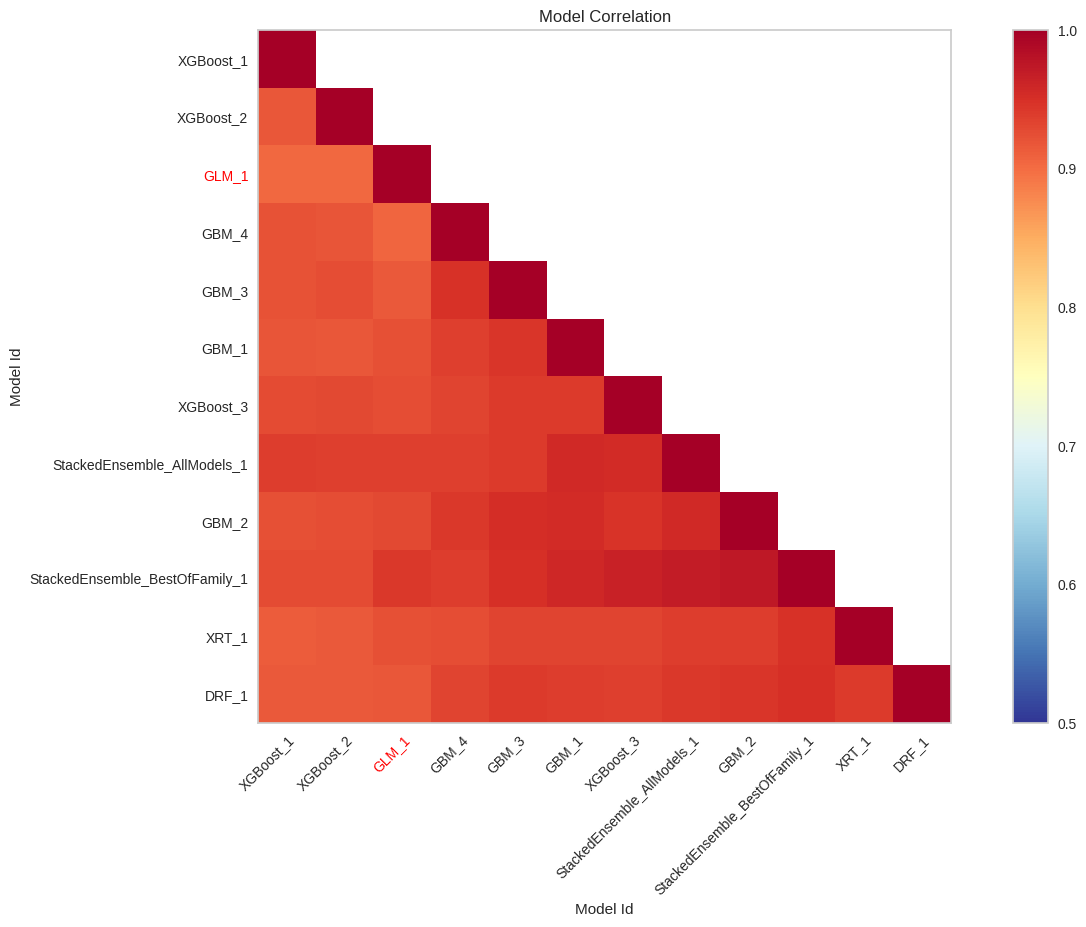

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

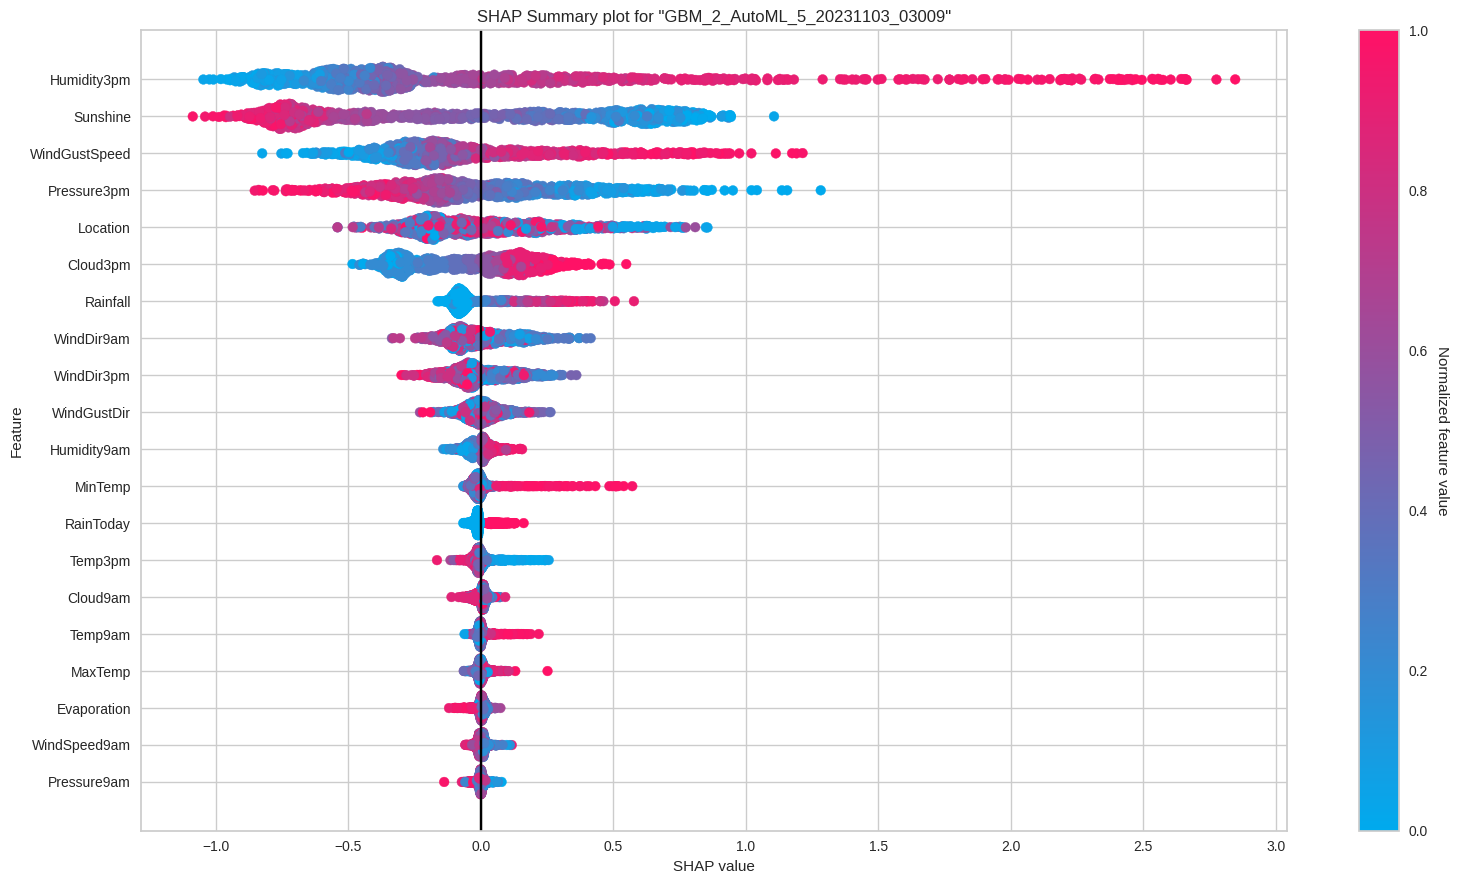

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

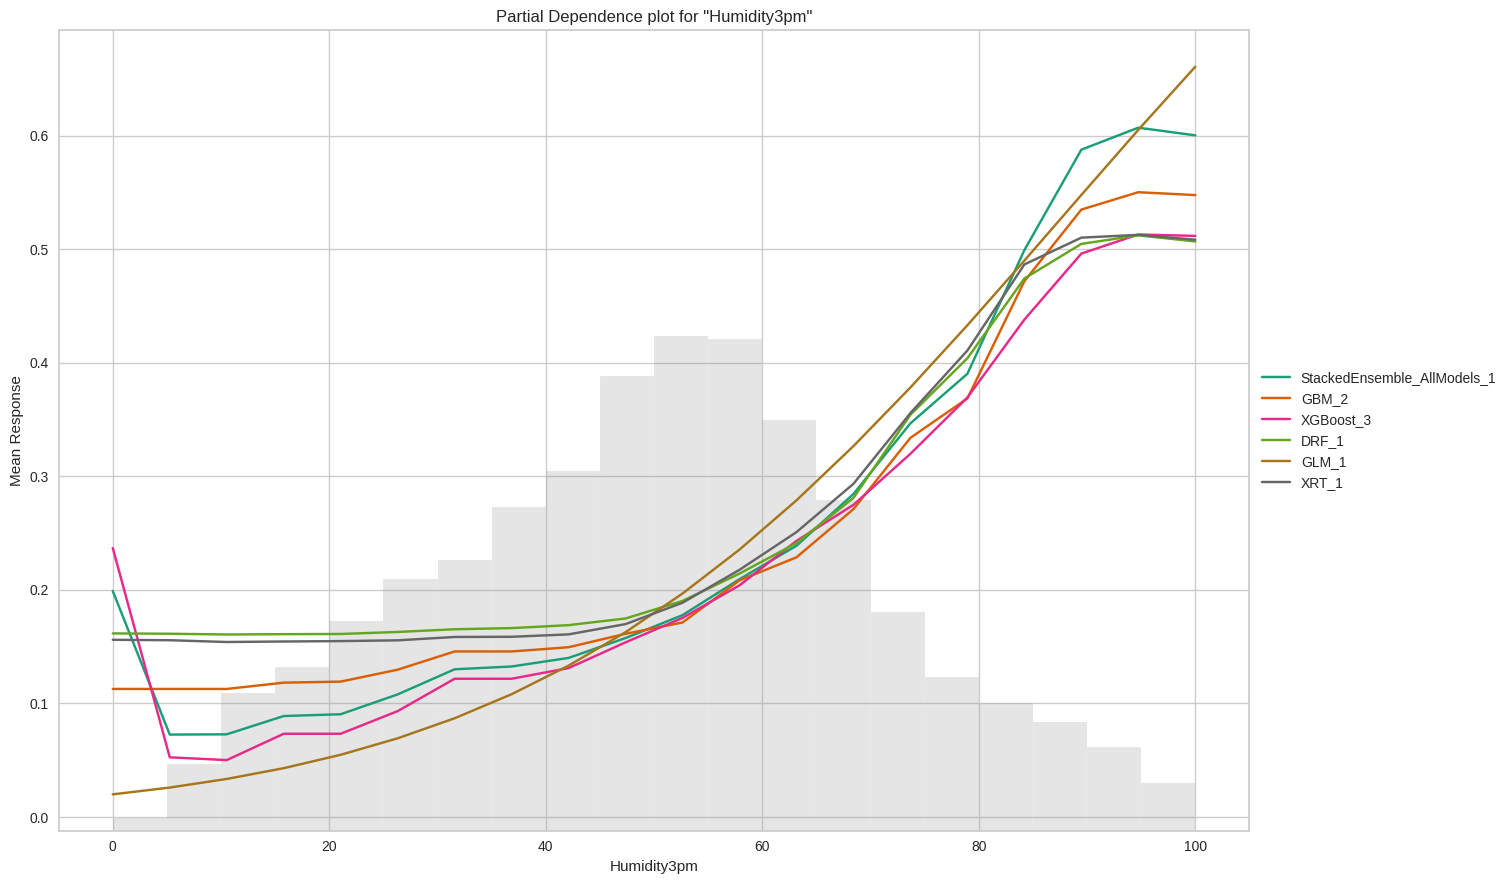

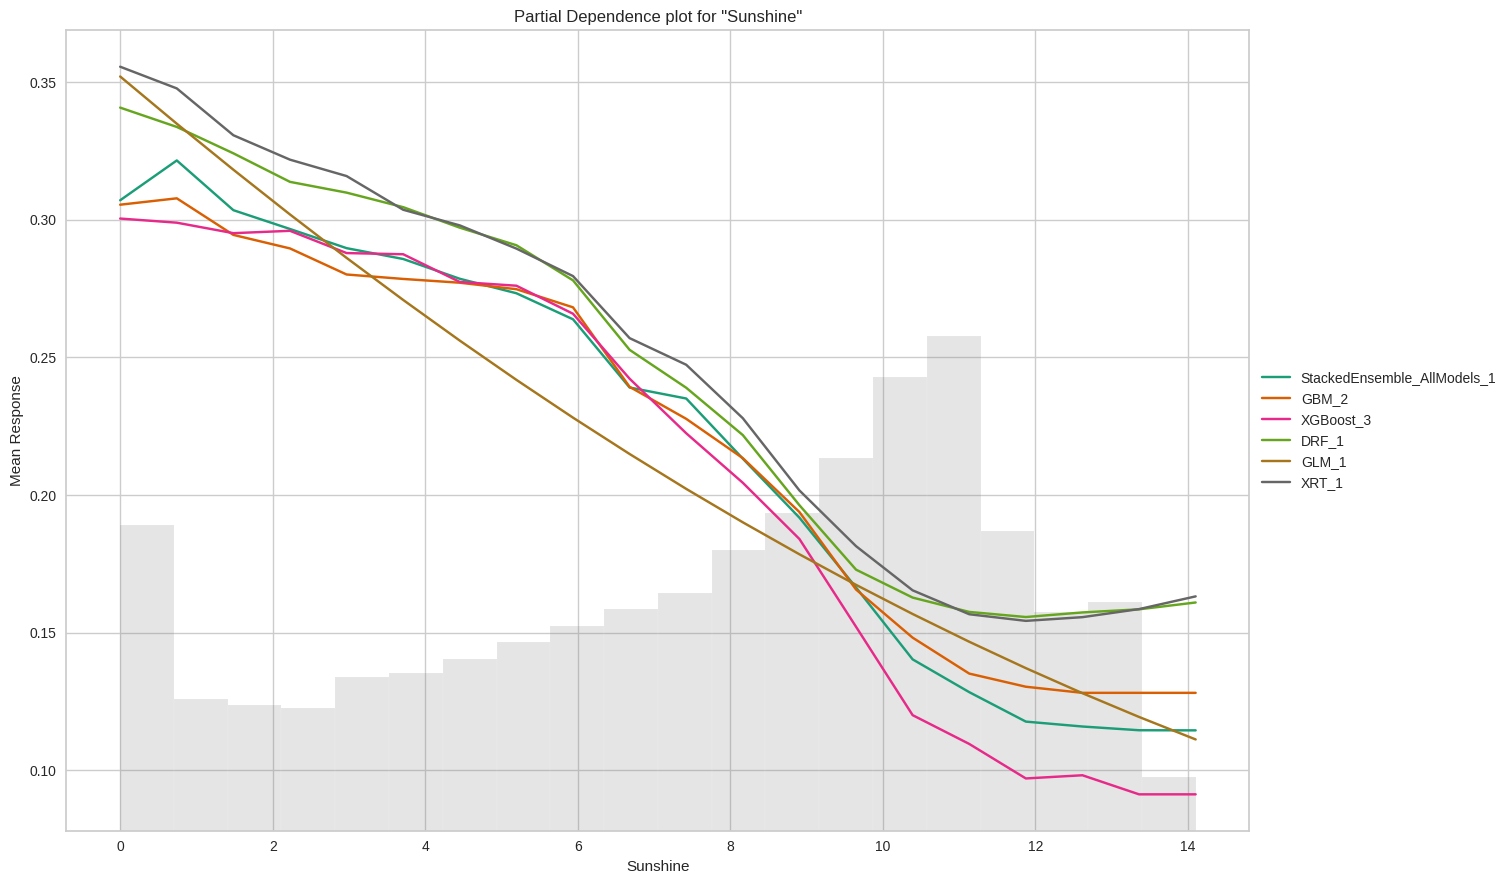

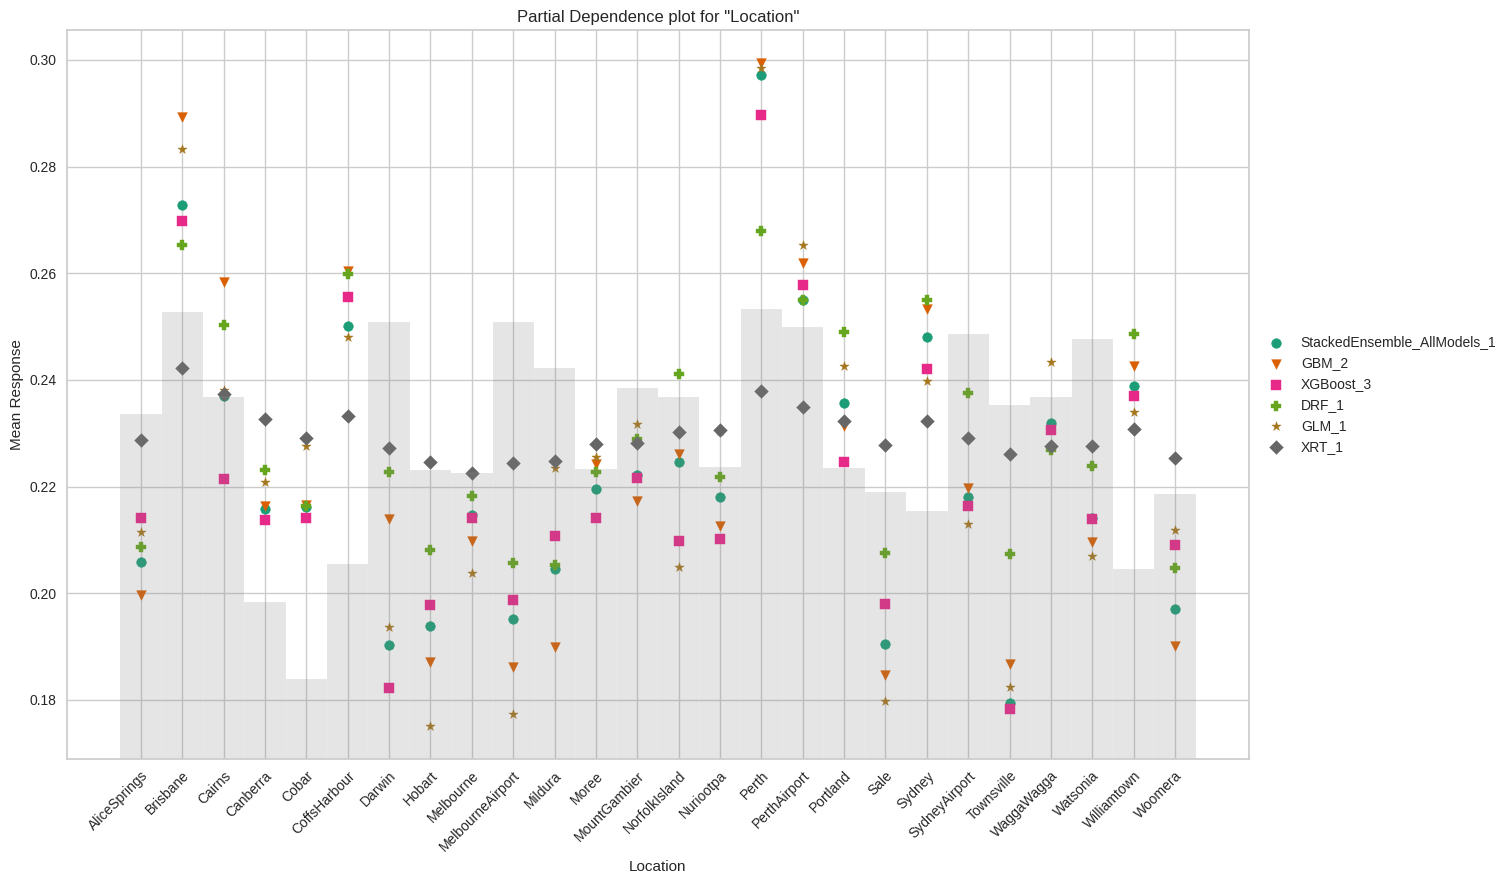

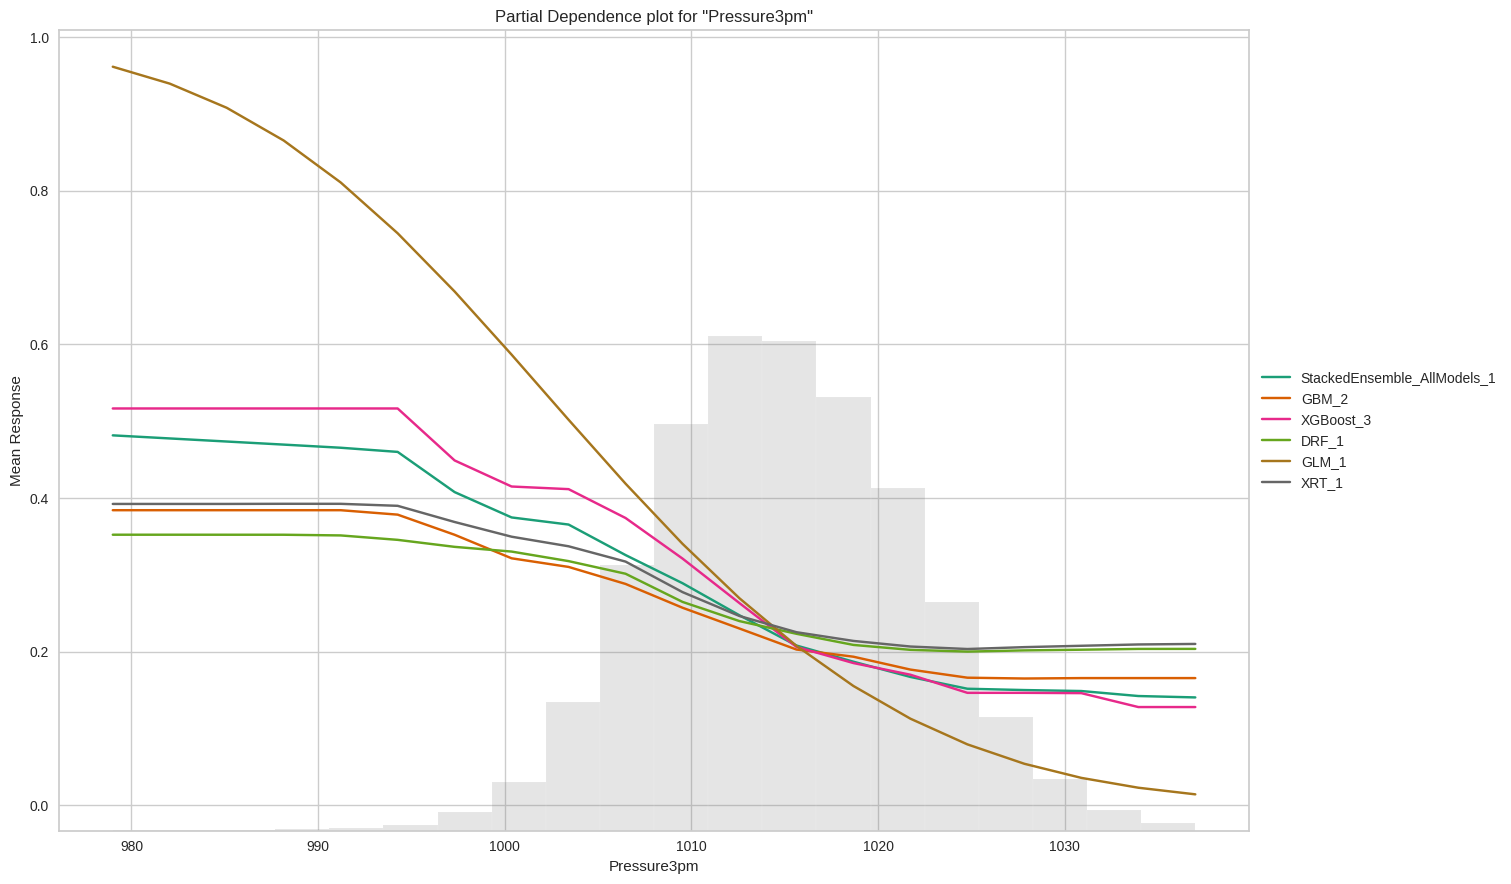

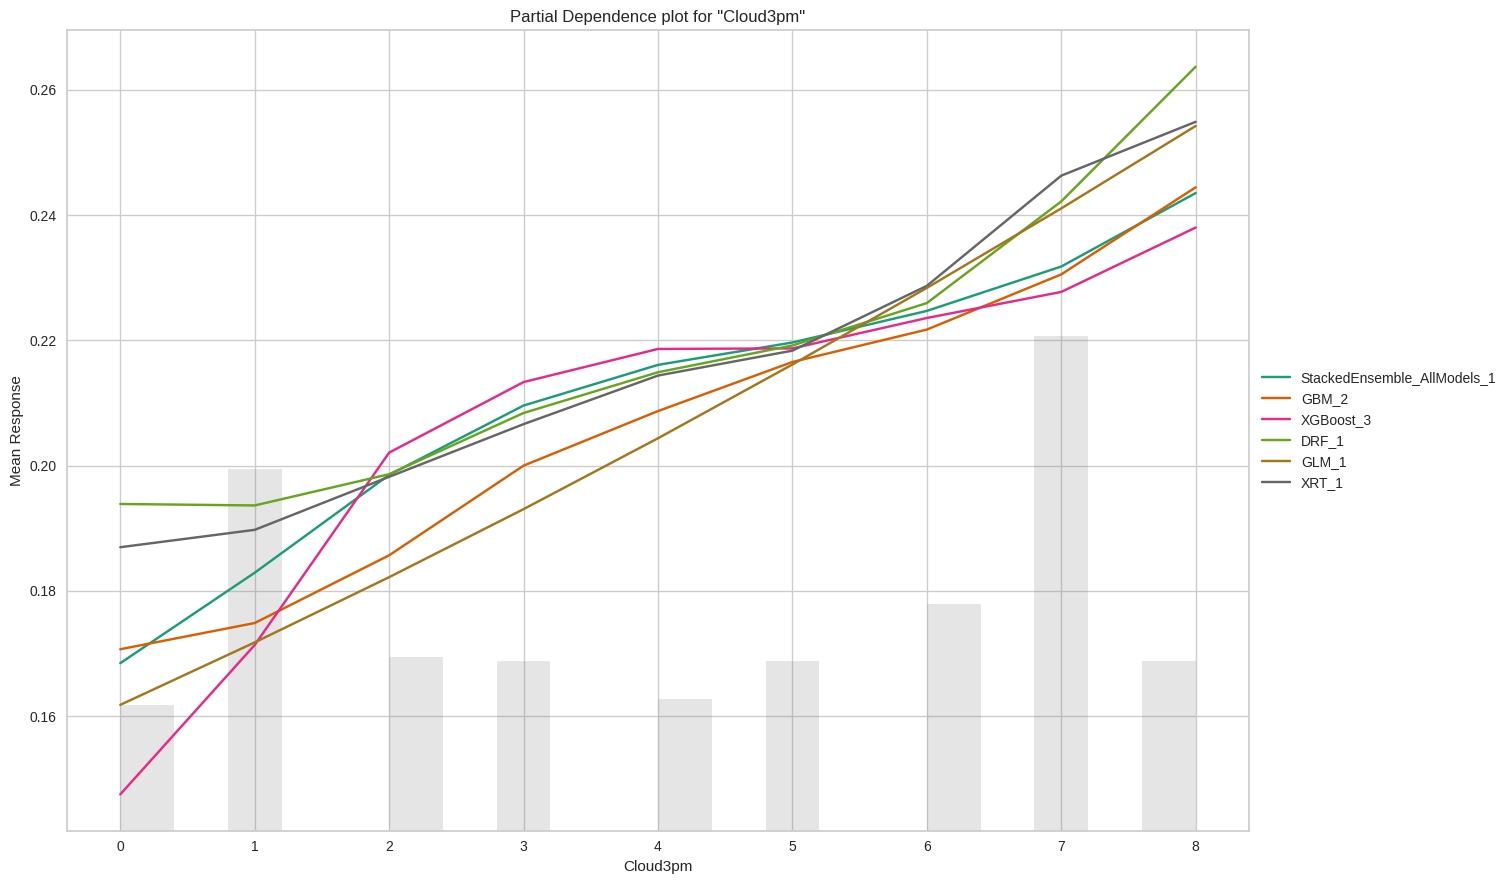

In [ ]:
explain_model = aml.explain(frame = df_test)

## Regularization

###L1 (Lasso) regularization

In [ ]:
# Create an H2OGeneralizedLinearEstimator with L1 (Lasso) regularization
model_lasso = H2OGeneralizedLinearEstimator(
    family="Binomial",
    alpha=1,  # Adjust the alpha value for L1 regularization
    nfolds=5
)

# Train the model
model_lasso.train(x=X,y=y_numeric,training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698942143345_7936


GLM Model: summary
    family    link    regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 1.89E-4 )  93                            75                             6                       py_674_sid_8e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10134601508235051
RMSE: 0.3183488889290341
LogLoss: 0.32530948929031017
AUC: 0.8919999219784824
AUCPR: 0.7350909787131127
Gini: 0.7839998439569649
Null degrees of freedom: 44977
Residual degrees of freedom: 44902
Null deviance: 47458.805956781835
Residual deviance: 29263.540418599143
AIC: 29415.540418599143

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3116942864295271
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     30725  4334   0.1236   (4334.0/35059.0)
Yes    2807   7112   0.283    (2807.0/9919.0)
Total  33532  11446  0.1588   (7141.0/44978.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.311694     0.665762  219
max f2                       0.131839     0.750276  298
max f0point5                 0.545407     0.696883  139
max accuracy                 0.527858     0.858442  145
max precision                0.997004     1         0
max recall                   0.00577168   1         396
max specificity              0.997004     1         0
max absolute_mcc             0.362922     0.567526  199
max min_per_class_accuracy   0.213049     0.806634  258
max mean_per_class_accuracy  0.202625     0.807901  263
max tns                      0.997004     35059     0
max fns                      0.997004     9892      0
max fps                      0.00285977   35059     399
max tps                      0.00577168   9919      396
max tnr                      0.997004     1         0
max fnr                      0.997004     0.997278  0
max fpr                      0.00285977   1         399
max tpr                      0.00577168   1         396

Gains/Lift Table: Avg response rate: 22.05 %, avg score: 22.05 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100049                   0.965285           4.38338    4.38338            0.966667         0.98008     0.966667                    0.98008             0.0438552       0.0438552                  338.338   338.338            0.0434274
2        0.0200098                   0.936831           4.28261    4.333              0.944444         0.950953    0.955556                    0.965517            0.0428471       0.0867023                  328.261   333.3              0.0855614
3        0.0300147                   0.910117           4.28261    4.3162             0.944444         0.924162    0.951852                    0.951732            0.0428471       0.129549                   328.261   331.62             0.127695
4        0.0400196                   0.882598           4.12138    4.2675             0.908889         0.896669    0.941111                    0.937966            0.041234        0.170783                   312.138   326.75             0.


Training_classification_error for iteration 6: 0.1587665
This value represents the training classification error, which is complementary to accuracy. To calculate accuracy:

Accuracy = 1 - Training Classification Error
Accuracy = 1 - 0.1587665
Accuracy ≈ 0.8412335

So, the accuracy of the model, based on the above data, is approximately **84.12%**.

###L0 (Ridge) regularization

In [ ]:
# Create an H2OGeneralizedLinearEstimator with L0 (Ridge) regularization
model_ridge = H2OGeneralizedLinearEstimator(
    family="binomial",
    alpha=0,  # Adjust the alpha value for L1 regularization
    nfolds=5,
)

# Train the model
model_ridge.train(x=X,y=y_numeric,training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698942143345_7954


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 1.89E-4 )  93                            93                             5                       py_674_sid_8e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10126128780821096
RMSE: 0.318215788119023
LogLoss: 0.32502467048409894
AUC: 0.8922482223239191
AUCPR: 0.735369467396691
Gini: 0.7844964446478382
Null degrees of freedom: 44977
Residual degrees of freedom: 44884
Null deviance: 47458.805956781835
Residual deviance: 29237.919258067603
AIC: 29425.919258067603

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3025253724548887
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     30565  4494   0.1282   (4494.0/35059.0)
Yes    2709   7210   0.2731   (2709.0/9919.0)
Total  33274  11704  0.1601   (7203.0/44978.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.302525     0.666882  223
max f2                       0.140428     0.750735  296
max f0point5                 0.577593     0.696831  129
max accuracy                 0.526035     0.858664  146
max precision                0.997005     1         0
max recall                   0.00507536   1         396
max specificity              0.997005     1         0
max absolute_mcc             0.365577     0.568874  198
max min_per_class_accuracy   0.211663     0.806412  262
max mean_per_class_accuracy  0.207246     0.807602  264
max tns                      0.997005     35059     0
max fns                      0.997005     9890      0
max fps                      0.00261519   35059     399
max tps                      0.00507536   9919      396
max tnr                      0.997005     1         0
max fnr                      0.997005     0.997076  0
max fpr                      0.00261519   1         399
max tpr                      0.00507536   1         396

Gains/Lift Table: Avg response rate: 22.05 %, avg score: 22.05 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100049                   0.966351           4.39346    4.39346            0.968889         0.980688    0.968889                    0.980688            0.043956        0.043956                   339.346   339.346            0.0435567
2        0.0200098                   0.938416           4.26246    4.32796            0.94             0.952315    0.954444                    0.966502            0.0426454       0.0866015                  326.246   332.796            0.085432
3        0.0300147                   0.912134           4.29269    4.3162             0.946667         0.925217    0.951852                    0.95274             0.0429479       0.129549                   329.269   331.62             0.127695
4        0.0400196                   0.883643           4.13146    4.27002            0.911111         0.898051    0.941667                    0.939068            0.0413348       0.170884                   313.146   327.002            0.


training_classification_error for iteration 6: 0.1601450
This value represents the training classification error, which is complementary to accuracy. To calculate accuracy:

Accuracy = 1 - Training Classification Error
Accuracy = 1 - 0.1601450
Accuracy ≈ 0.839855

So, the accuracy of the model, based on the above data, is approximately 83.98%.

### Which regularization works better ?

* Without Regularization (86% Accuracy): An accuracy of 86% indicates that the model performs relatively well on the training data. However, it may also imply that the model is somewhat overfitting the training data, meaning it may not generalize as well to new, unseen data.


* Lasso Regularization (84% Accuracy): Lasso (L1) regularization adds a penalty term to the model's loss function that encourages some of the model's coefficients to become exactly zero. This has a feature selection effect, meaning it selects a subset of the most important features and discards others. The decrease in accuracy (from 86% to 84%) suggests that some features were considered important by the non-regularized model but are set to zero by Lasso regularization.


* Ridge Regularization (83% Accuracy): Ridge (L2) regularization adds a penalty term that discourages large coefficients but does not force them to be exactly zero. It's effective in preventing multicollinearity among features. The decrease in accuracy (from 86% to 83%) suggests that Ridge regularization is constraining the model's coefficients to a greater extent compared to the non-regularized model.

#**3. Model Interpretablity**

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os


import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew

from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
from graphviz import Source
import pydot
import matplotlib.image as mpimg

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

##Fit Tree Based model

In [ ]:
# Setting the max_dept to 3 for the purpose of readability
tree_model = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

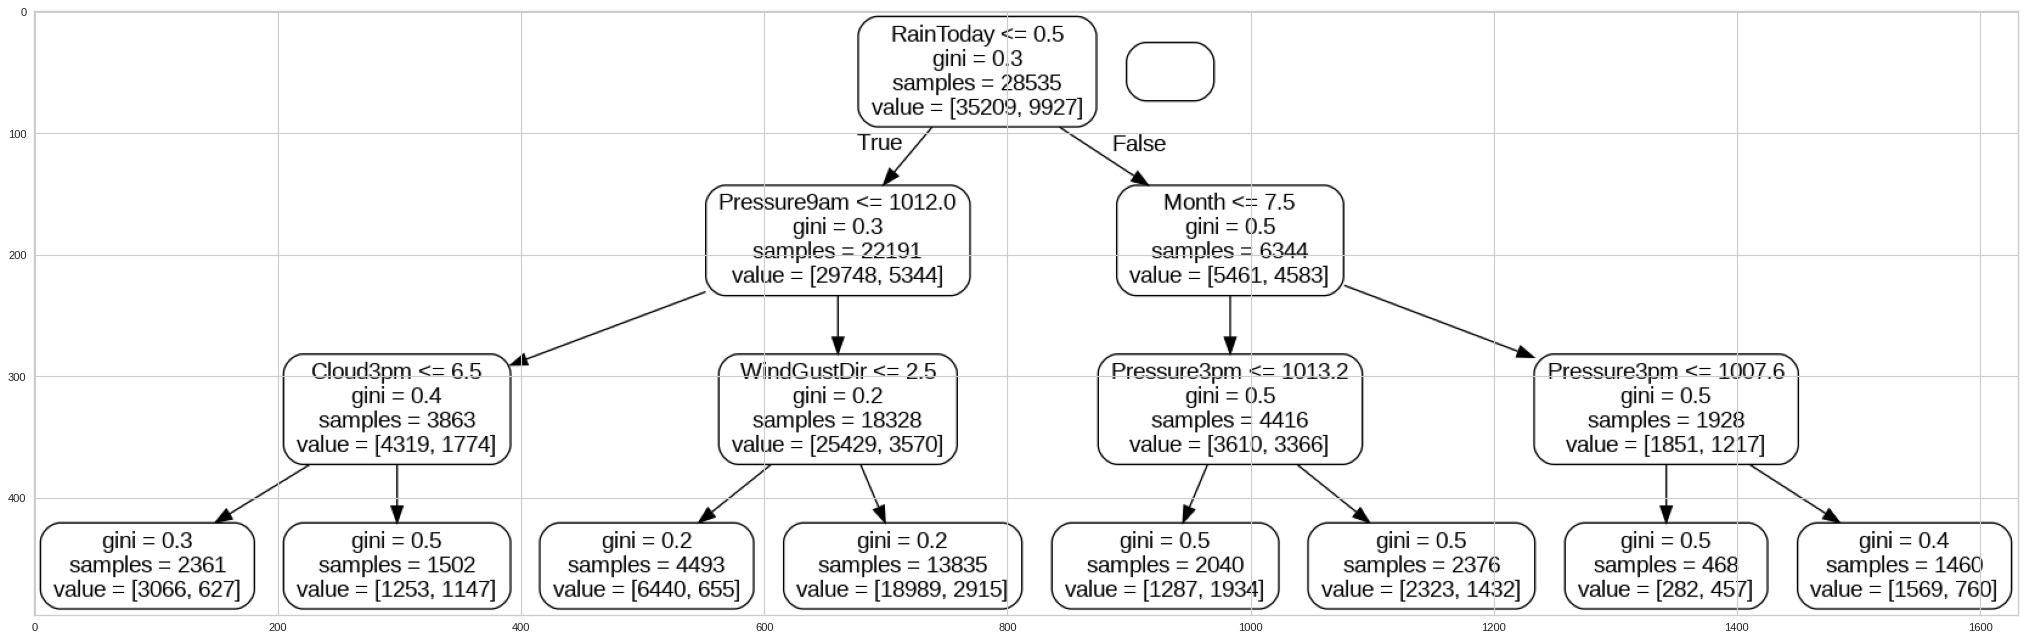

In [ ]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

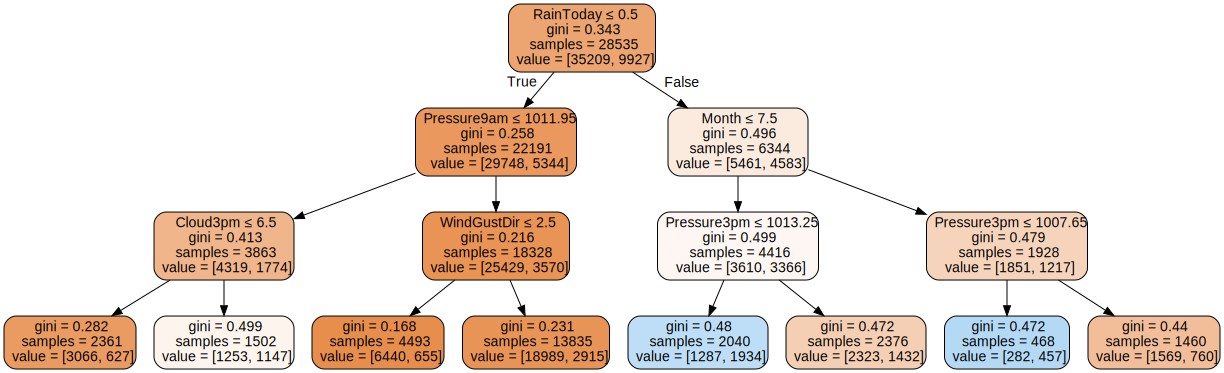

In [ ]:
tree = tree_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=list(x_train.columns),
                           filled=True, rounded=True, special_characters=True)
graph = Source(dot_data)
graph.format = 'png'
graph.render('tree',view=True)

display(graph)

The tree model starts by checking the number of samples. If the number of samples is greater than or equal to 28535, then the flowchart goes to the next step. This suggests that the number of samples is an important feature for the classification problem.

The next step in the flowchart is to check the gini value. If the gini value is greater than or equal to 0.3, then the flowchart goes to the next step. This suggests that the gini value is also an important feature for the classification problem.

The flowchart then checks the pressure at 9am and the wind gust direction at 9am. If the pressure at 9am is less than or equal to 1012.0 and the wind gust direction at 9am is less than or equal to 7.5, then the flowchart goes to the next step. This suggests that the pressure at 9am and the wind gust direction at 9am are important features for the classification problem, but only if the gini value is greater than or equal to 0.3.

The flowchart then checks the cloud cover at 3pm, the wind gust direction at 3pm, and the pressure at 3pm. These features are only checked if the pressure at 9am is less than or equal to 1012.0 and the wind gust direction at 9am is less than or equal to 7.5. This suggests that these features are less important for the classification problem than the number of samples, the gini value, the pressure at 9am, and the wind gust direction at 9am.

Overall, the flowchart suggests that the following features are important for the classification problem:

Pressure at 9am

Wind gust direction at 9am

Cloud cover at 3pm

Wind gust direction at 3pm

Pressure at 3pm

In [ ]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [ ]:
# Print out the feature and importances
[print("Variable: {:10} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Cloud3pm   Importance: 0.32
Variable: Rainfall   Importance: 0.14
Variable: RainToday  Importance: 0.12
Variable: Humidity3pm Importance: 0.1
Variable: Cloud9am   Importance: 0.06
Variable: Sunshine   Importance: 0.05
Variable: WindGustSpeed Importance: 0.05
Variable: Pressure9am Importance: 0.05
Variable: Pressure3pm Importance: 0.05
Variable: Humidity9am Importance: 0.03
Variable: MaxTemp    Importance: 0.01
Variable: Temp9am    Importance: 0.01
Variable: Location   Importance: 0.0
Variable: MinTemp    Importance: 0.0
Variable: Evaporation Importance: 0.0
Variable: WindGustDir Importance: 0.0
Variable: WindDir9am Importance: 0.0
Variable: WindDir3pm Importance: 0.0
Variable: WindSpeed9am Importance: 0.0
Variable: WindSpeed3pm Importance: 0.0
Variable: Temp3pm    Importance: 0.0
Variable: Year       Importance: 0.0
Variable: Month      Importance: 0.0
Variable: Day        Importance: 0.0


##SHAP values

In [ ]:
import random
import shap
import matplotlib.pyplot as plt



# set seed for reproducibility
np.random.seed(123)

x_train_50 = shap.utils.sample(X_train, 50, random_state=123)
x_test_50 = shap.utils.sample(X_test, 50, random_state=123)

In [ ]:
rfe_explainer = shap.Explainer(rfe.predict, x_train_50, seed = 1)
rfe_shap_values = rfe_explainer(x_train)

PermutationExplainer explainer: 45137it [5:58:29,  2.10it/s]


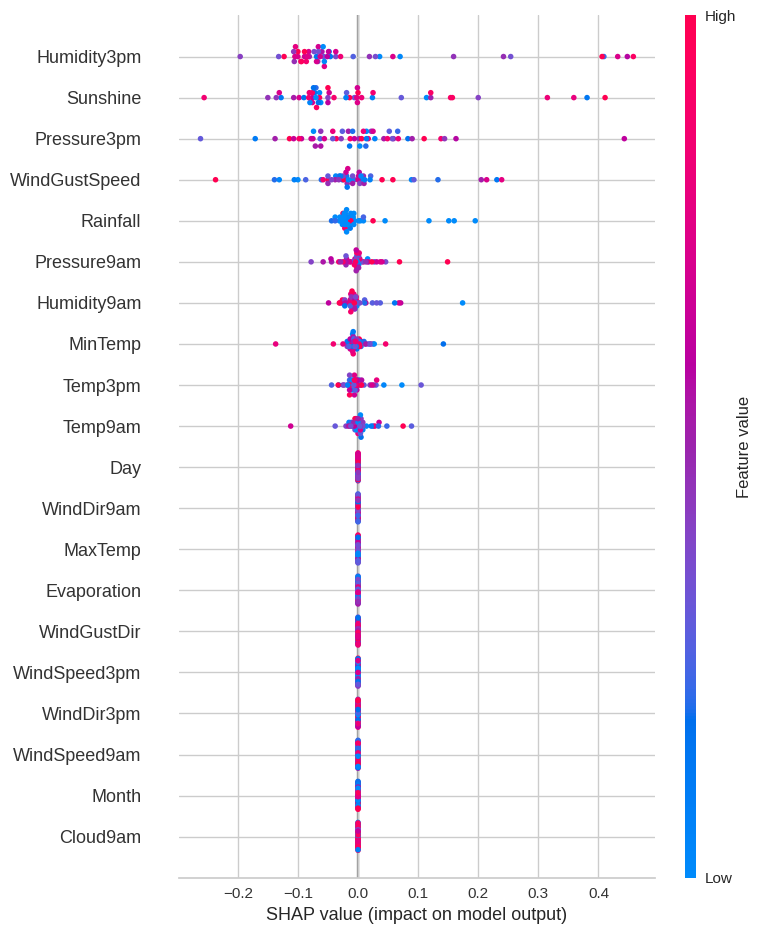

In [ ]:
shap.summary_plot(rfe_shap_values, x_test_50)

The strongest correlation between wind speed and pressure is observed at high wind speeds. This suggests that the relationship between wind speed and pressure is non-linear and becomes stronger at higher wind speeds.

The plot shows a slight negative correlation between humidity and pressure at low wind speeds. This is likely due to the fact that high humidity can lead to cloud formation and precipitation, which can reduce pressure.

The plot also shows that there is a wider range of humidity values at higher wind speeds and pressures. This suggests that humidity is more variable at higher wind speeds and pressures.

Overall, the plot suggests that there is a positive correlation between wind speed and pressure, and that humidity is higher at higher wind speeds and pressures. The relationship between wind speed and pressure is non-linear and becomes stronger at higher wind speeds.

Humidity is also more variable at higher wind speeds and pressures.

# Questions

1. **ML Data Cleaning and Feature Selection:**
   - **What is the question?**
     - The main question was to prepare and analyze the data for machine learning, focusing on cleaning, exploring, and selecting features for predictive modeling.

   - **What did you do?**
     - Conducted Exploratory Data Analysis (EDA) on both categorical and continuous variables.
     - Utilized ProfileReport to identify missing values and imputed them using MICE Imputer.
     - Plotted graphs for both dependent and independent variables to understand their likely distributions.
     - Analyzed important dependent variables using techniques like Select K-best, heat map, and feature correlation.
     - Calculated accuracy and confusion matrix using Random Forest Classifier and Logistic Regression.
     - Removed outliers at different percentages (1%, 5%, and 10%) and observed the impact on accuracy.

   - **How well did it work?**
     - The data cleaning and feature selection process provided insights into the distribution of variables and helped in identifying important features for modeling. The evaluation using different classifiers and outlier removal also gave an understanding of model performance under different scenarios.

   - **What did you learn?**
     - The importance of exploring and cleaning data before modeling.
     - The impact of outliers on model accuracy.
     - The effectiveness of different feature selection techniques.

2. **AutoML:**
   - **What is the question?**
     - The question here was to explore and utilize AutoML for model training and selection.

   - **What did you do?**
     - Applied H2O AutoML to the dataset.
     - Displayed and examined the Leaderboard to compare various models.
     - Compared and examined different models generated by AutoML.
     - Selected the best model based on performance.
     - Applied regularization techniques (Lasso and Ridge) to the chosen model.

   - **How well did it work?**
     - AutoML provided a quick and efficient way to explore multiple models and their performances.
     - The Leaderboard comparison and model examination allowed for an informed choice of the best-performing model.
     - Regularization was applied to enhance the chosen model's robustness.

   - **What did you learn?**
     - The benefits of automated model selection and training.
     - The importance of regularization in model performance.

3. **Model Interpretability:**
   - **What is the question?**
     - The question in this case was to interpret the chosen model and understand the impact of features.

   - **What did you do?**
     - Fitted a tree-based model for interpretability.
     - Utilized Recursive Feature Elimination (RFE) for Shap Values.
     - Plotted a SHAP summary plot to interpret the model's behavior.

   - **How well did it work?**
     - The tree-based model and SHAP values provided insights into feature importance and their impact on predictions.
     - The SHAP summary plot visually represented the contribution of each feature to the model's output.

   - **What did you learn?**
     - The interpretability of machine learning models, especially through techniques like SHAP values.
     - How individual features contribute to the model's predictions.

These activities collectively demonstrate a comprehensive approach to data preparation, modeling, and interpretation in a machine learning project.

# References

[Machine Learning A-Z™: AI, Python & R + ChatGPT Bonus [2023]- Udemy](https://www.udemy.com/course/machinelearning/)

[Data Cleaning and EDA- Youtube](https://www.youtube.com/watch?v=VCt7UaIr64I)

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

https://machinelearningmastery.com/calculate-feature-importance-with-python/



#Copyright

Copyright (c) 2023 Asawari Anant Kadam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.